<a href="https://colab.research.google.com/github/dtabuena/Patch_Ephys/blob/main/abf_batching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# !pip install nbimporter
# !pip install pyabf
from IPython.display import clear_output

In [75]:
import pyabf
import os
import pandas as pd
import urllib
import sys
from matplotlib import pyplot as plt
import numpy as np

In [76]:
'''Get Repositories'''
"run dtabuena's ephys notebooks"

parent_folder = r'D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project'
os.chdir(parent_folder)
code_dir = 'git_code'
os.makedirs(code_dir,exist_ok=True)
os.chdir(code_dir)
to_import = [
            'latencey_analyzer.ipynb',
            'membrane_analyzer.ipynb',
            'rmp_analyzer.ipynb',
            'gain_analyzer.ipynb',
            'input_resistance_analyzer.ipynb',
            'rheobase_analyzer.ipynb',
            'IV_analyzer.ipynb',
            'misc_utils.ipynb',
            ]
for f in to_import:
    git_link = 'https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/'+f
    print(git_link)
    urllib.request.urlretrieve(git_link,f)
    %run $f

response = urllib.request.urlretrieve('https://raw.githubusercontent.com/dtabuena/Resources/main/Matplotlib_Config/Load_FS6.py','Load_FS6.py')
%run Load_FS6.py

https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/latencey_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/membrane_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/rmp_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/gain_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/input_resistance_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/rheobase_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/IV_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/misc_utils.ipynb


In [77]:
git_link = 'https://raw.githubusercontent.com/dtabuena/Patch_Ephys/refs/heads/main/misc_utils.ipynb'
urllib.request.urlretrieve(git_link,'misc_utils.ipynb')
print(git_link)
%run misc_utils.ipynb

https://raw.githubusercontent.com/dtabuena/Patch_Ephys/refs/heads/main/misc_utils.ipynb


In [78]:
def cell_prot_lut(protocol_groups, csv_name='Protocol_LUT.csv'):
    import pandas as pd
    import os

    rows = []
    for protocol, df in protocol_groups.items():
        df = df.copy()
        df.reset_index(inplace=True)  # to keep filename as column
        df['protocol'] = protocol
        df['file_name'] = df['file_name'].apply(os.path.basename)
        rows.append(df)

    lut_df = pd.concat(rows, ignore_index=True)
    cols = ['file_name', 'cell_id', 'protocol'] + [col for col in lut_df.columns if col not in ['file_name', 'cell_id', 'protocol']]
    lut_df = lut_df[cols].sort_values(by=['cell_id', 'protocol'])

    lut_df.to_csv(csv_name, index=False)

    return lut_df



In [142]:
def catalogue_recs(file_loc, file_naming_scheme):
    file_list = [
        os.path.join(root, f)
        for root, _, files in os.walk(file_loc)
        for f in files if f.endswith('.abf')
    ]

    abf_recordings_df = pd.DataFrame(file_list, columns=['file_name']).set_index('file_name')
    for col in file_naming_scheme + ['cell_id', 'protocol', 'abf_timestamp', 'channelList','sweeps']:
        abf_recordings_df[col] = None

    for filename in abf_recordings_df.index:
        if filename.endswith('.sta'):
            continue

        try:
            abf = pyabf.ABF(filename)
        except (pyabf.ABFException, FileNotFoundError) as e:
            print(f'ABF import error ({filename}): {e}')
            continue

        try:
            base_name = os.path.basename(filename)
            split_words = base_name.split('_')

            cell_id = '_'.join(split_words[:len(file_naming_scheme)])
            abf_recordings_df.at[filename, 'cell_id'] = cell_id

            for idx, field in enumerate(file_naming_scheme):
                abf_recordings_df.at[filename, field] = split_words[idx]

            abf_recordings_df.at[filename, 'protocol'] = abf.protocol
            abf_recordings_df.at[filename, 'abf_timestamp'] = abf.abfDateTime.strftime('%Y_%m_%d %I:%M %p')
            abf_recordings_df.at[filename, 'channelList'] = abf.channelList
            abf_recordings_df.at[filename, 'sweeps'] = len(abf.sweepList)
        except (IndexError, AttributeError, ValueError) as e:
            print(f'Data handling error ({filename}): {e}')
            continue

    abf_recordings_df.sort_index(inplace=True)
    protocol_groups = {protocol: df for protocol, df in abf_recordings_df.groupby('protocol')}

    return protocol_groups



os.chdir(parent_folder)
os.makedirs('analysis',exist_ok=True)
os.chdir('analysis')
dataset = {'data_name': 'data',
           'data_source': r"D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs",
           'file_naming_scheme': ['Rec_date','Region','Slice_Num'],
           }
protocol_groups = catalogue_recs(dataset['data_source'],dataset['file_naming_scheme'])
lut_df = cell_prot_lut(protocol_groups, csv_name='Protocol_LUT.csv')
display(lut_df)

file_name              cell_id  \
24  2025x03x13_PreOA_S1_0000.abf  2025x03x13_PreOA_S1   
25  2025x03x13_PreOA_S1_0001.abf  2025x03x13_PreOA_S1   
26  2025x03x13_PreOA_S1_0002.abf  2025x03x13_PreOA_S1   
0   2025x03x13_PreOA_S2_0000.abf  2025x03x13_PreOA_S2   
1   2025x03x13_PreOA_S2_0002.abf  2025x03x13_PreOA_S2   
..                           ...                  ...   
61  2025x03x14_PreOA_S7_0015.abf  2025x03x14_PreOA_S7   
71  2025x03x14_PreOA_S7_0001.abf  2025x03x14_PreOA_S7   
72  2025x03x14_PreOA_S7_0012.abf  2025x03x14_PreOA_S7   
82  2025x03x14_PreOA_S7_0002.abf  2025x03x14_PreOA_S7   
83  2025x03x14_PreOA_S7_0013.abf  2025x03x14_PreOA_S7   

                   protocol    Rec_date Region Slice_Num        abf_timestamp  \
24       I0 - GapFree - LFP  2025x03x13  PreOA        S1  2025_03_13 11:57 AM   
25       I0 - GapFree - LFP  2025x03x13  PreOA        S1  2025_03_13 11:58 AM   
26       I0 - GapFree - LFP  2025x03x13  PreOA        S1  2025_03_13 12:01 PM   
0         I0 - 3min GapFree  2025x03x13  PreOA        S2  2025_03_13 04:19 PM   
1         I0 - 3min GapFree  2025x03x13  PreOA        S2  2025_03_13 04:21 PM   
..                      ...         ...    ...       ...                  ...   
61            IC - Rheobase  2025x03x14  PreOA        S7  2025_03_14 05:47 PM   
71  VC - MemTest-10ms-160ms  2025x03x14  PreOA        S7  2025_03_14 05:25 PM   
72  VC - MemTest-10ms-160ms  2025x03x14  PreOA        S7  2025_03_14 05:45 PM   
82    VC - Multi IV - 150ms  2025x03x14  PreOA        S7  2025_03_14 05:26 PM   
83    VC - Multi IV - 150ms  2025x03x14  PreOA        S7  2025_03_14 05:45 PM   

   channelList sweeps  
24      [0, 1]      1  
25      [0, 1]      1  
26      [0, 1]      1  
0       [0, 1]      1  
1       [0, 1]      1  
..         ...    ...  
61      [0, 1]      2  
71      [0, 1]      3  
72      [0, 1]      3  
82      [0, 1]     17  
83      [0, 1]     17  

[85 rows x 9 columns]

In [143]:
spike_args_gain = {'spike_thresh':10, 'high_dv_thresh':20, 'low_dv_thresh':-5, 'window_ms':3}
spike_args_lat = {'spike_thresh':10, 'high_dv_thresh':30, 'low_dv_thresh':-10, 'window_ms':2}
spike_args_rheo = {'spike_thresh':10, 'high_dv_thresh':30, 'low_dv_thresh':-10, 'window_ms':2}

protocol_analyzers = {
    'VC - 3min GapFree': (rmp_analyzer, [True]),
    'I0 - 3min GapFree': (rmp_analyzer, [True]),
    'IC - Rheobase': (rheobase_analyzer, [spike_args_rheo, True, False, False]),
    'IC - Gain - D10pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D20pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D25pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D50pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'VC - MemTest-10ms-160ms': (membrane_analyzer, [True, False, ['Ra', 'Rm', 'Cm', 'tau', 'Cmq', 'Cmf', 'Cmqf', 'Cm_pc']]),
    'IC - Latentcy 800pA-1s': (latencey_analyzer, [spike_args_lat, True]),
    'IC - R input': (input_resistance_analyzer, [[-30, 10], True]),
    'VC - Multi IV - 150ms': (IV_analyzer, [{'IV_Early':(16.5, 30), 'IV_Steady_State':(100,120)}, [False, True]])
}




In [144]:
from tqdm import tqdm
import pandas as pd

def execute_analysis_suite(protocol_groups, protocol_analyzers):
    problem_records = {}
    analyzer_outputs = {}

    # Step 1: **Create an empty metadata-ready DataFrame per analyzer**
    for protocol, protocol_df in protocol_groups.items():
        if protocol not in protocol_analyzers:
            for filename in protocol_df.index:
                problem_records[filename] = 'No analyzer configured'
            continue

        analyzer_func, _ = protocol_analyzers[protocol]
        analyzer_name = analyzer_func.__name__

        # Initialize a DataFrame to hold metadata before analysis
        if analyzer_name not in analyzer_outputs:
            analyzer_outputs[analyzer_name] = protocol_df.copy()
            analyzer_outputs[analyzer_name] = analyzer_outputs[analyzer_name].drop(columns=[], errors='ignore')
            analyzer_outputs[analyzer_name]['protocol'] = protocol  # Keep track of protocol

    # Step 2: **Run analysis and store results in the pre-made DataFrames**
    for protocol, protocol_df in protocol_groups.items():
        if protocol not in protocol_analyzers:
            continue

        analyzer_func, analyzer_args = protocol_analyzers[protocol]
        analyzer_name = analyzer_func.__name__

        for filename in tqdm(protocol_df.index, desc=f'Analyzing {protocol}'):
            abf = pyabf.ABF(filename)
            try:
                results = analyzer_func(abf, *analyzer_args)

                # Store results in the already-prepared DataFrame
                for key, value in results.items():
                    if key not in analyzer_outputs[analyzer_name].columns:
                        analyzer_outputs[analyzer_name][key] = pd.Series(dtype='object')

                    analyzer_outputs[analyzer_name].at[filename, key] = value
            except Exception as e:
                problem_records[filename] = str(e)

    # Step 3: **Perform the final consolidation step**
    consolidated_results = {}
    for analyzer_name, df in analyzer_outputs.items():
        result_name = analyzer_name.replace('analyzer', 'results')
        consolidated_results[result_name] = df

    return consolidated_results, problem_records


Analyzing I0 - 3min GapFree:   0%|                                                              | 0/24 [00:00<?, ?it/s]

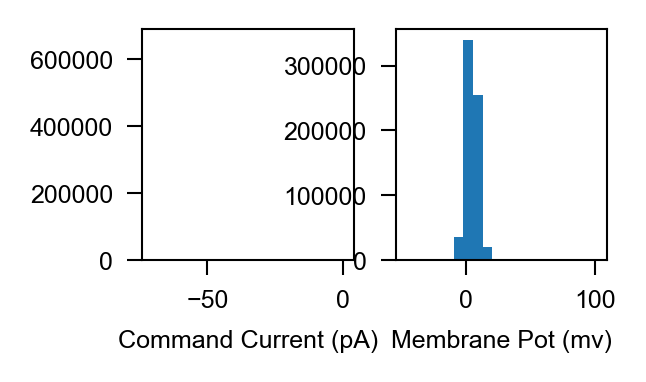

Analyzing I0 - 3min GapFree:   4%|██▎                                                   | 1/24 [00:00<00:12,  1.84it/s]

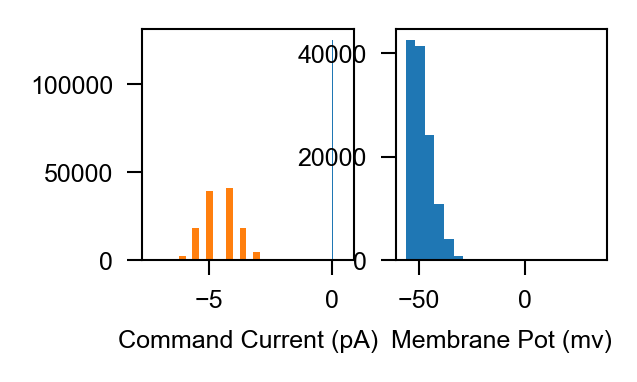

Analyzing I0 - 3min GapFree:   8%|████▌                                                 | 2/24 [00:01<00:11,  1.93it/s]

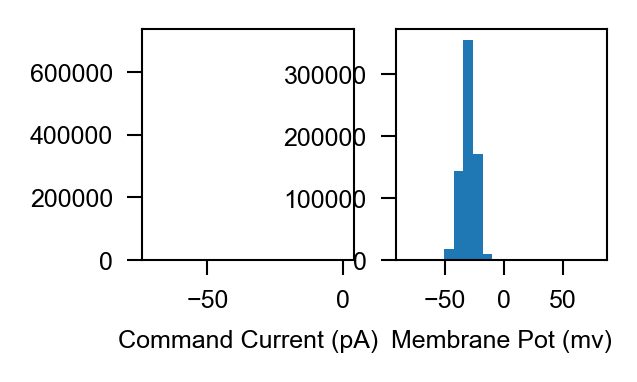

Analyzing I0 - 3min GapFree:  12%|██████▊                                               | 3/24 [00:01<00:11,  1.87it/s]

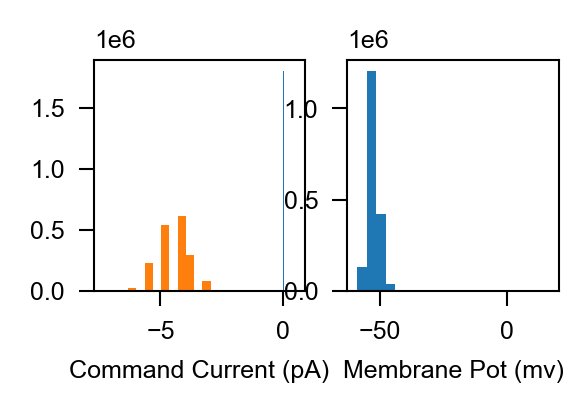

Analyzing I0 - 3min GapFree:  17%|█████████                                             | 4/24 [00:02<00:12,  1.65it/s]

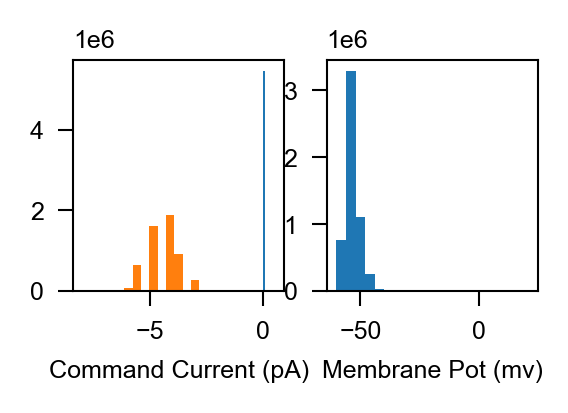

Analyzing I0 - 3min GapFree:  21%|███████████▎                                          | 5/24 [00:03<00:15,  1.21it/s]

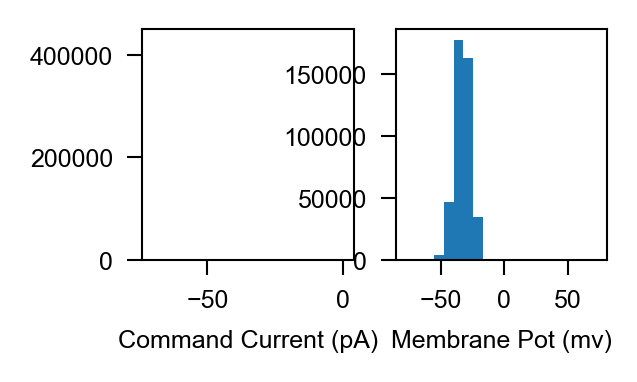

Analyzing I0 - 3min GapFree:  25%|█████████████▌                                        | 6/24 [00:04<00:13,  1.35it/s]

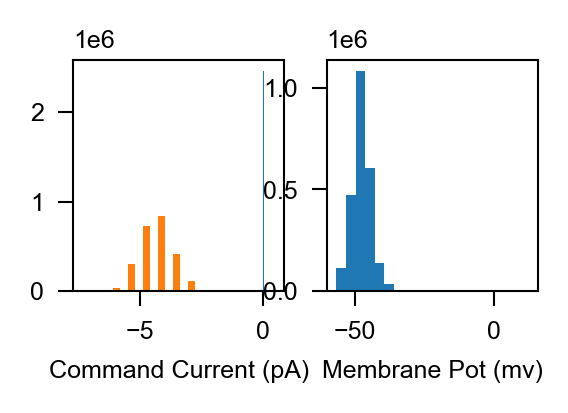

Analyzing I0 - 3min GapFree:  29%|███████████████▊                                      | 7/24 [00:04<00:12,  1.31it/s]

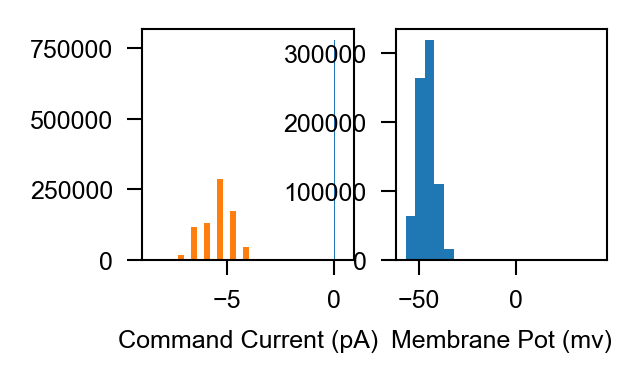

Analyzing I0 - 3min GapFree:  33%|██████████████████                                    | 8/24 [00:05<00:11,  1.40it/s]

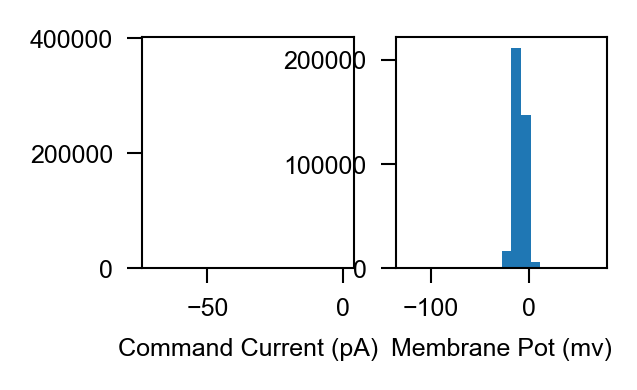

Analyzing I0 - 3min GapFree:  38%|████████████████████▎                                 | 9/24 [00:06<00:10,  1.48it/s]

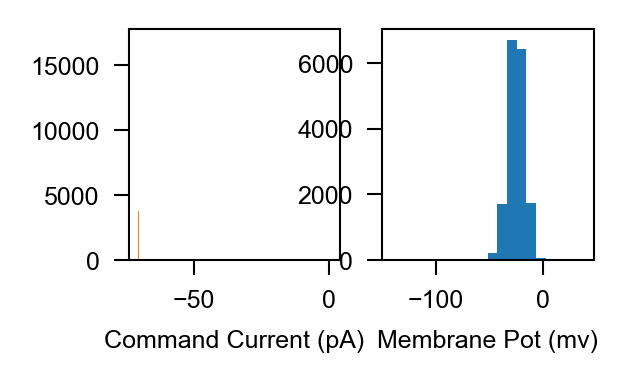

Analyzing I0 - 3min GapFree:  42%|██████████████████████                               | 10/24 [00:07<00:10,  1.32it/s]

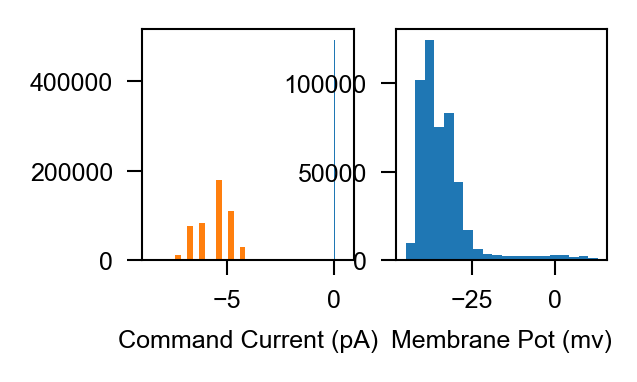

Analyzing I0 - 3min GapFree:  46%|████████████████████████▎                            | 11/24 [00:07<00:09,  1.38it/s]

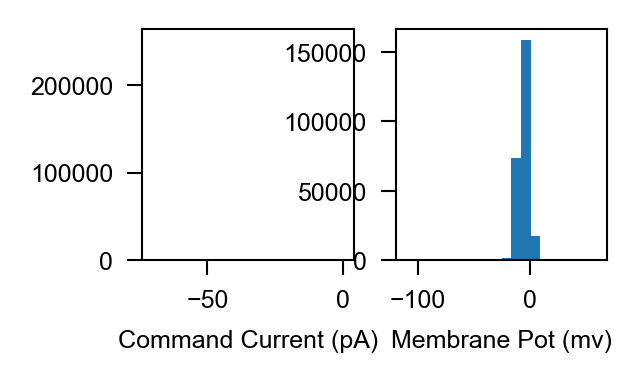

Analyzing I0 - 3min GapFree:  50%|██████████████████████████▌                          | 12/24 [00:08<00:08,  1.45it/s]

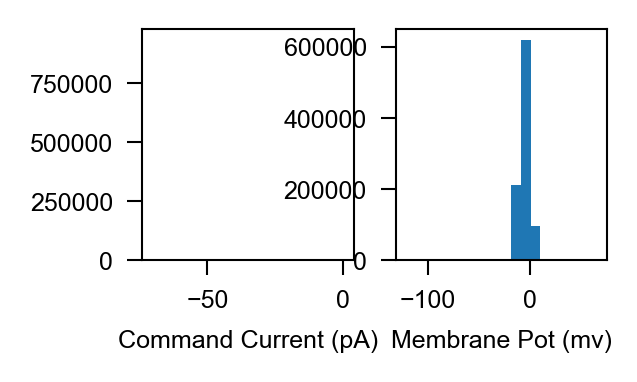

Analyzing I0 - 3min GapFree:  54%|████████████████████████████▋                        | 13/24 [00:08<00:07,  1.52it/s]

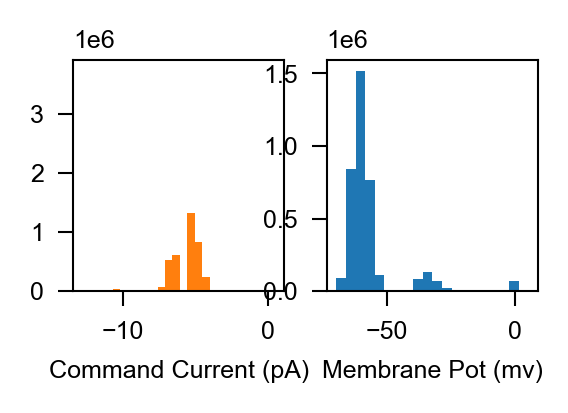

Analyzing I0 - 3min GapFree:  58%|██████████████████████████████▉                      | 14/24 [00:09<00:07,  1.35it/s]

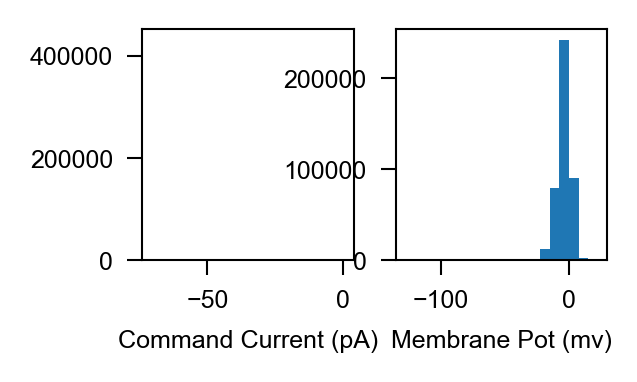

Analyzing I0 - 3min GapFree:  62%|█████████████████████████████████▏                   | 15/24 [00:10<00:06,  1.48it/s]

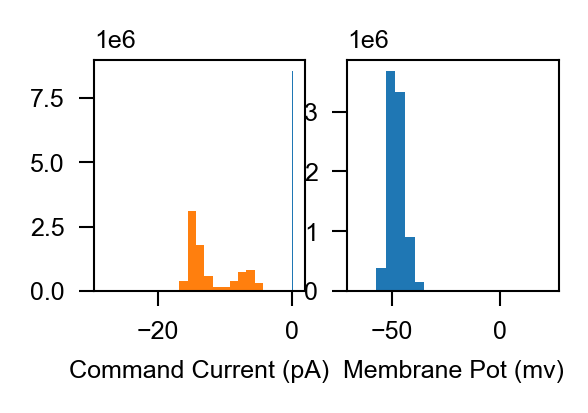

Analyzing I0 - 3min GapFree:  67%|███████████████████████████████████▎                 | 16/24 [00:11<00:07,  1.05it/s]

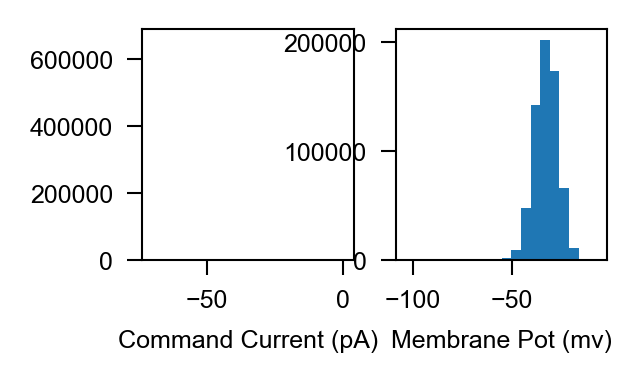

Analyzing I0 - 3min GapFree:  71%|█████████████████████████████████████▌               | 17/24 [00:12<00:05,  1.20it/s]

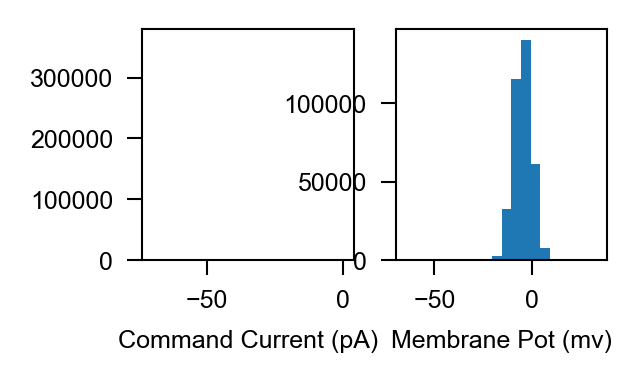

Analyzing I0 - 3min GapFree:  75%|███████████████████████████████████████▊             | 18/24 [00:13<00:04,  1.33it/s]

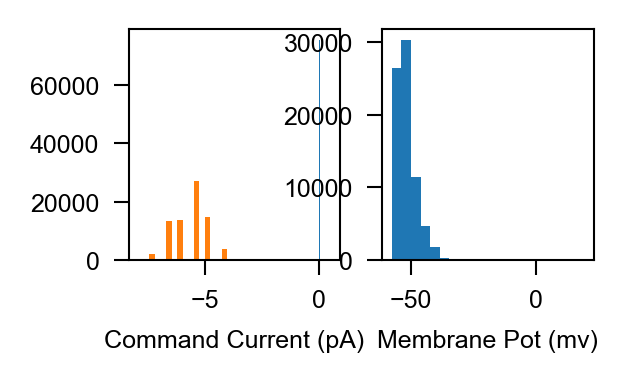

Analyzing I0 - 3min GapFree:  79%|█████████████████████████████████████████▉           | 19/24 [00:13<00:03,  1.49it/s]

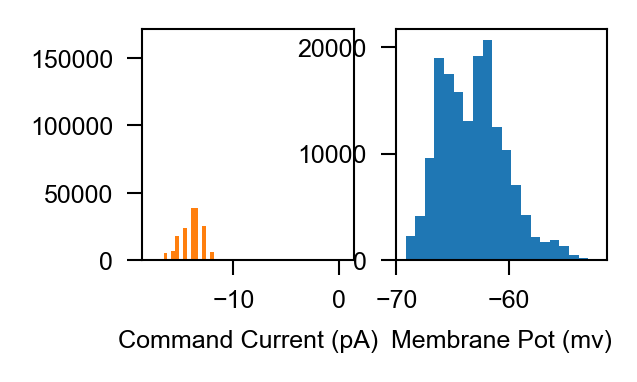

Analyzing I0 - 3min GapFree:  83%|████████████████████████████████████████████▏        | 20/24 [00:14<00:02,  1.59it/s]

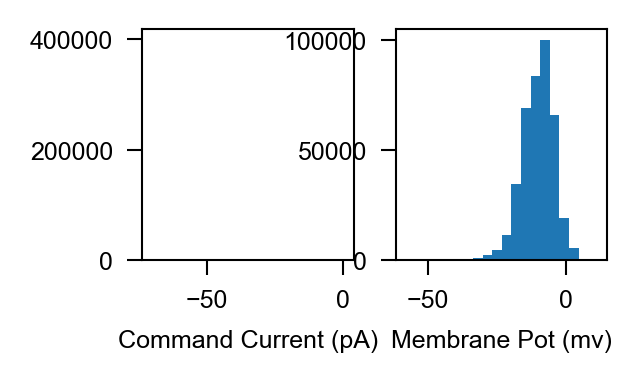

Analyzing I0 - 3min GapFree:  88%|██████████████████████████████████████████████▍      | 21/24 [00:14<00:01,  1.63it/s]

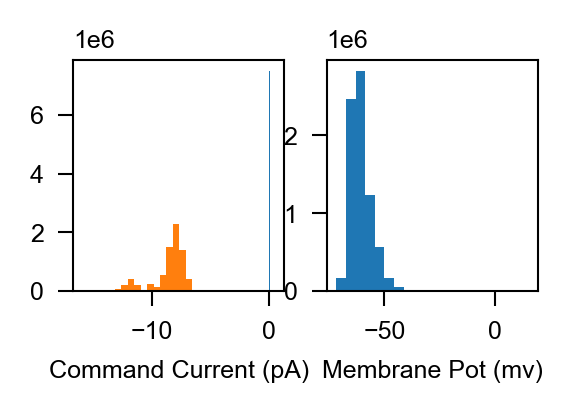

Analyzing I0 - 3min GapFree:  92%|████████████████████████████████████████████████▌    | 22/24 [00:16<00:01,  1.10it/s]

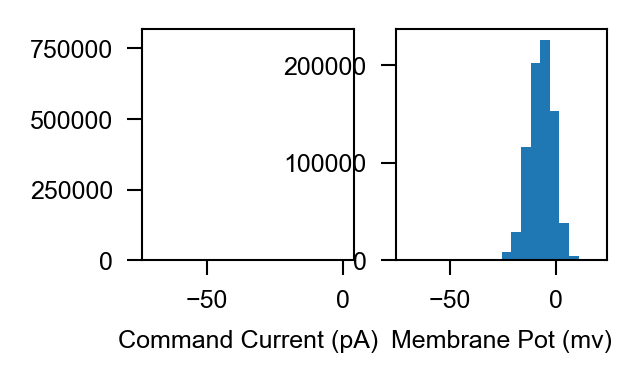

Analyzing I0 - 3min GapFree:  96%|██████████████████████████████████████████████████▊  | 23/24 [00:16<00:00,  1.23it/s]

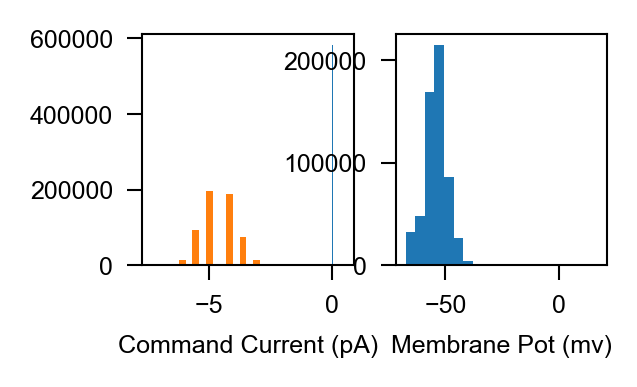

Analyzing IC - Gain - D10pA:   0%|                                                              | 0/10 [00:00<?, ?it/s]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


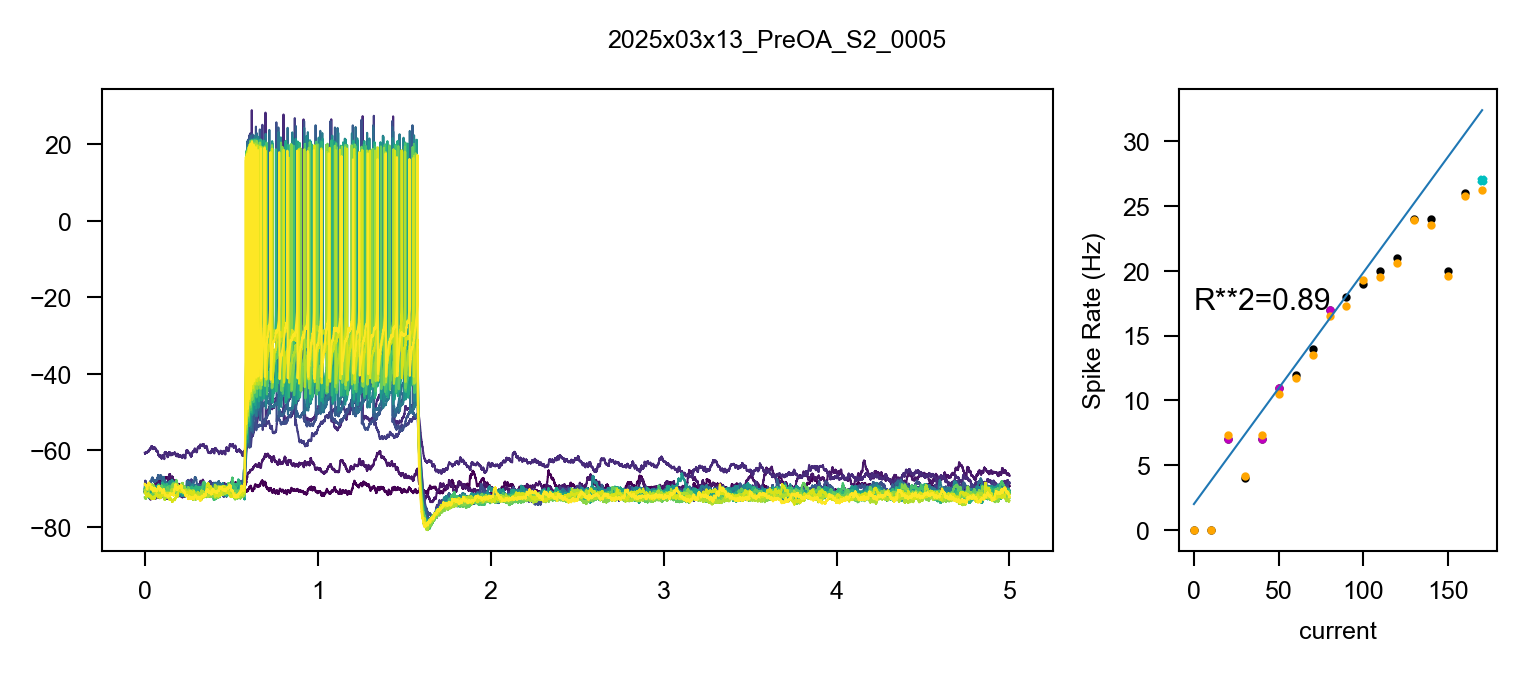

Analyzing IC - Gain - D10pA:  20%|██████████▊                                           | 2/10 [00:08<00:32,  4.03s/it]C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: divide by zero encountered in divide
  isi_ratio = (spike_counts/isi_rates)


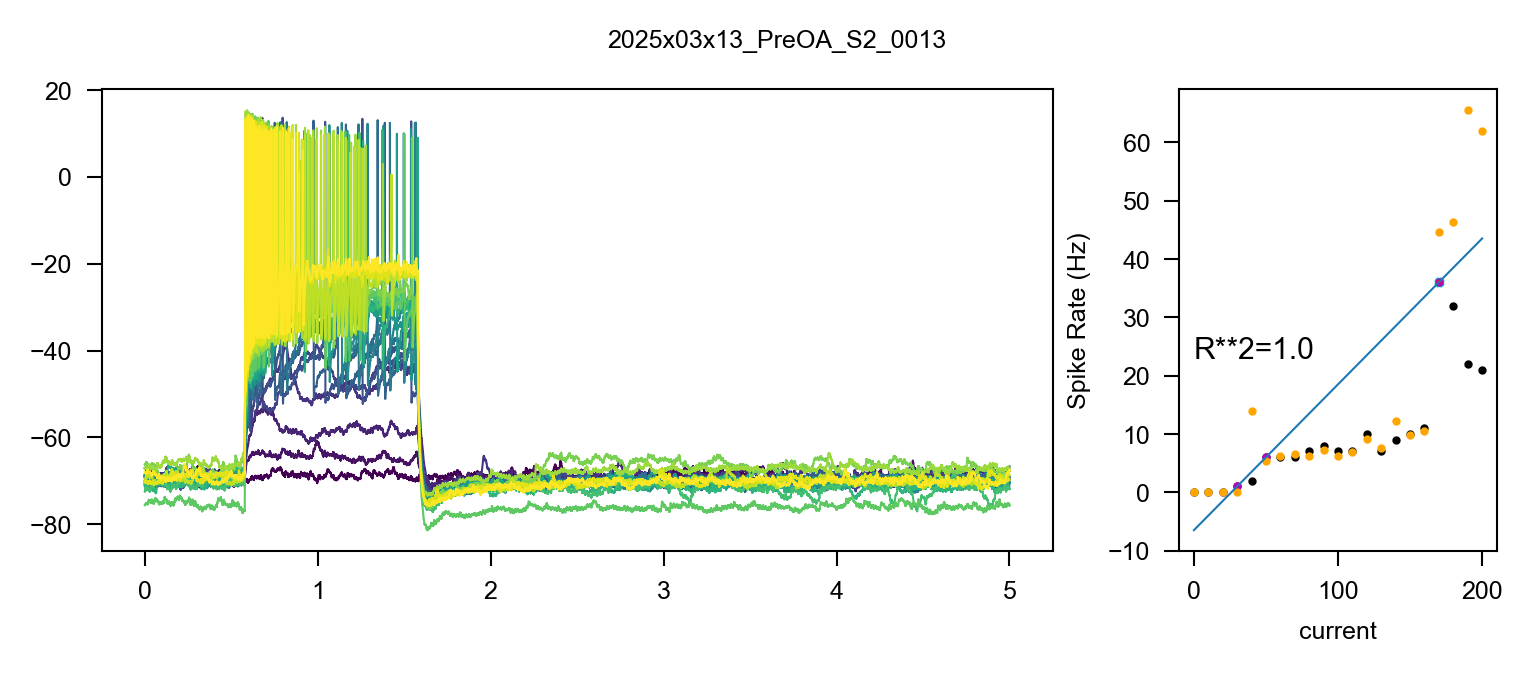

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: divide by zero encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  30%|████████████████▏                                     | 3/10 [00:17<00:43,  6.26s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: divide by zero enc

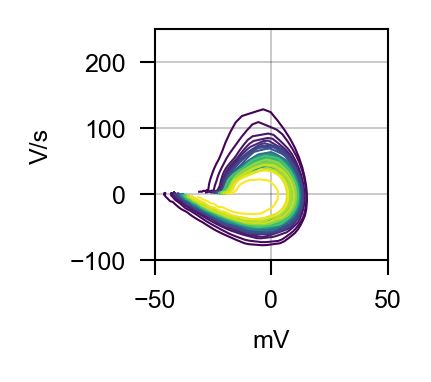

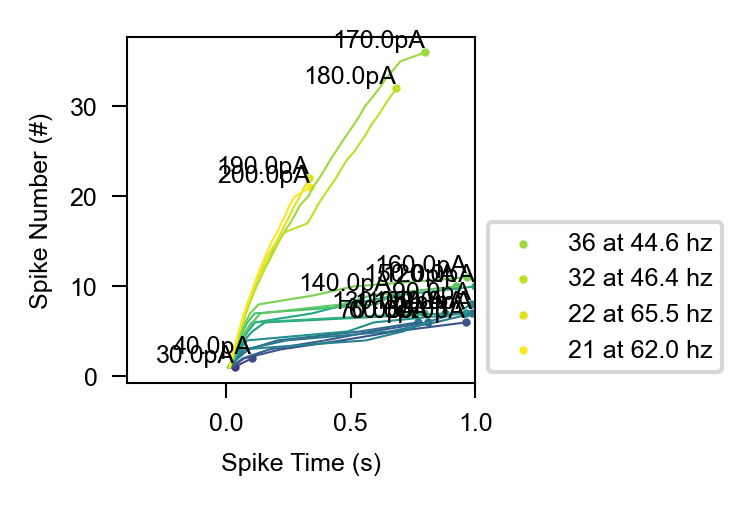

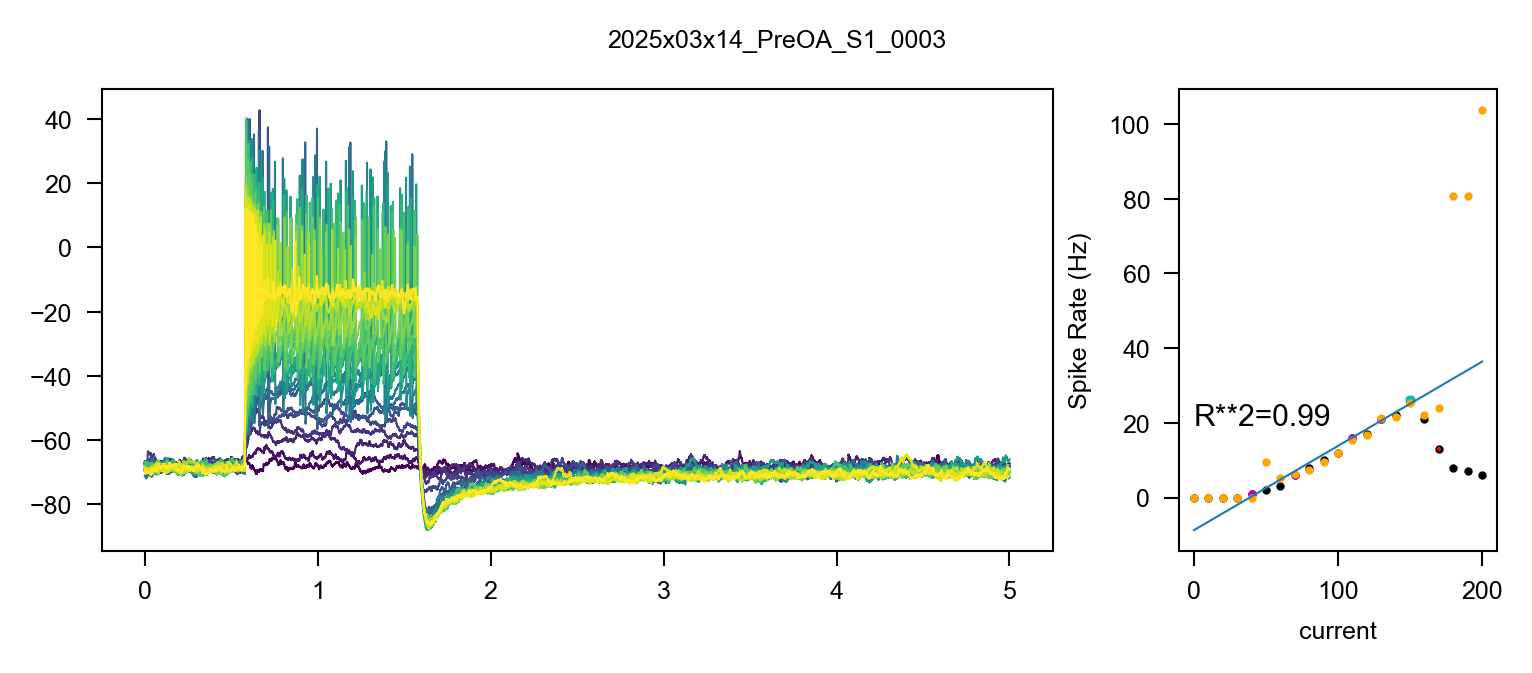

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: divide by zero encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  40%|█████████████████████▌                                | 4/10 [00:27<00:45,  7.61s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: divide by zero enc

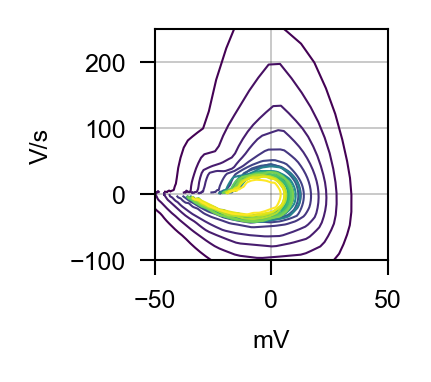

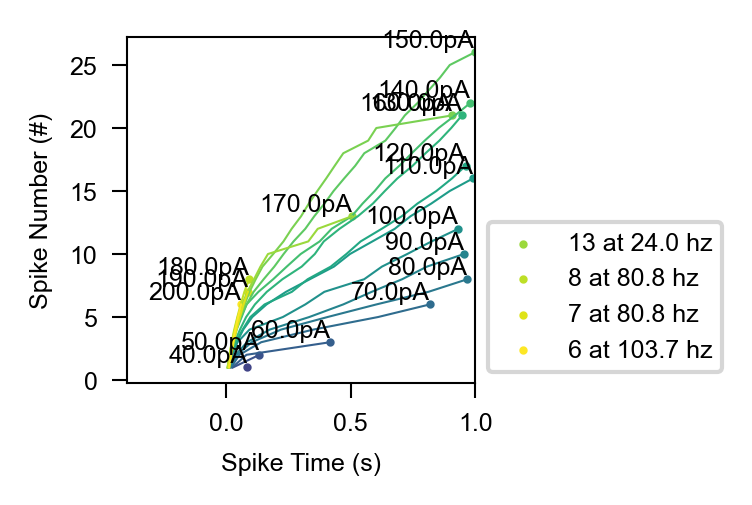

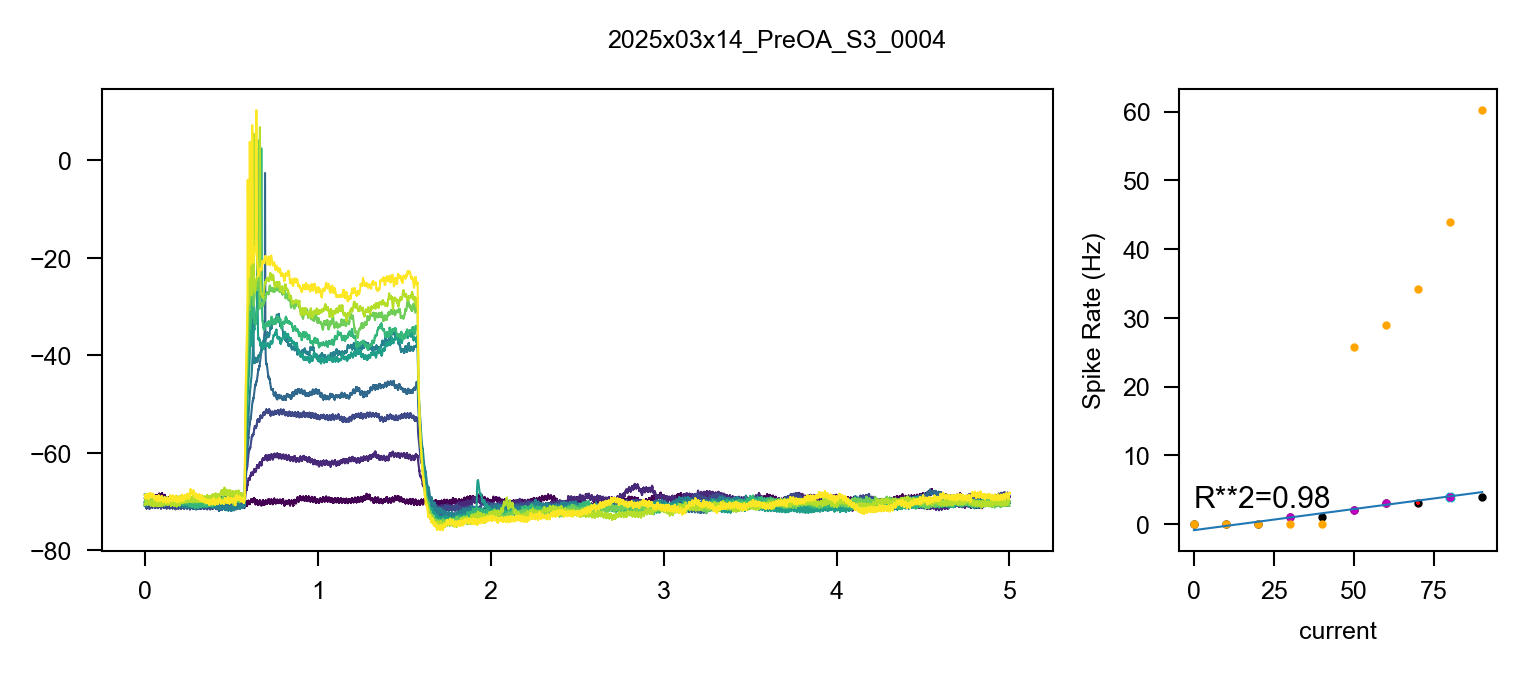

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: divide by zero encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  60%|████████████████████████████████▍                     | 6/10 [00:32<00:20,  5.08s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: invalid value enco

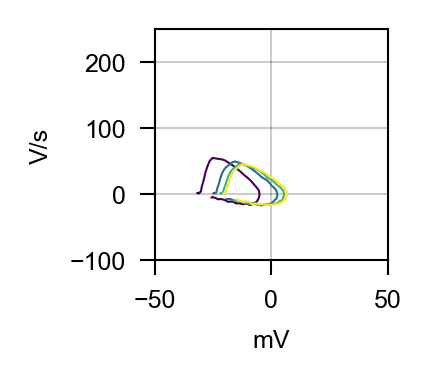

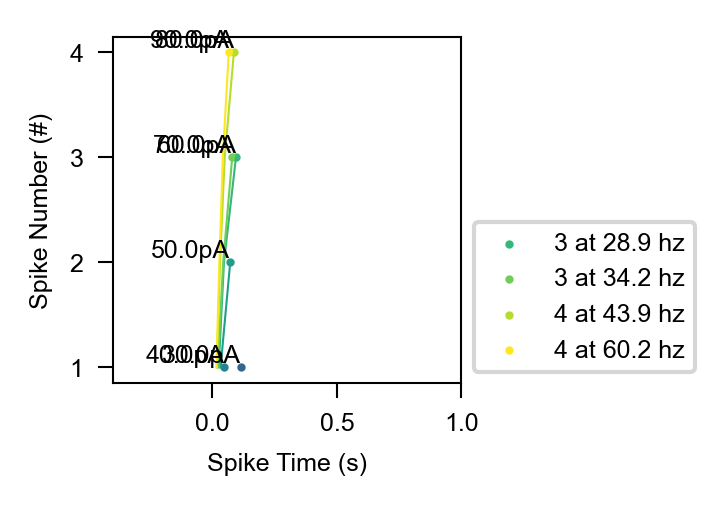

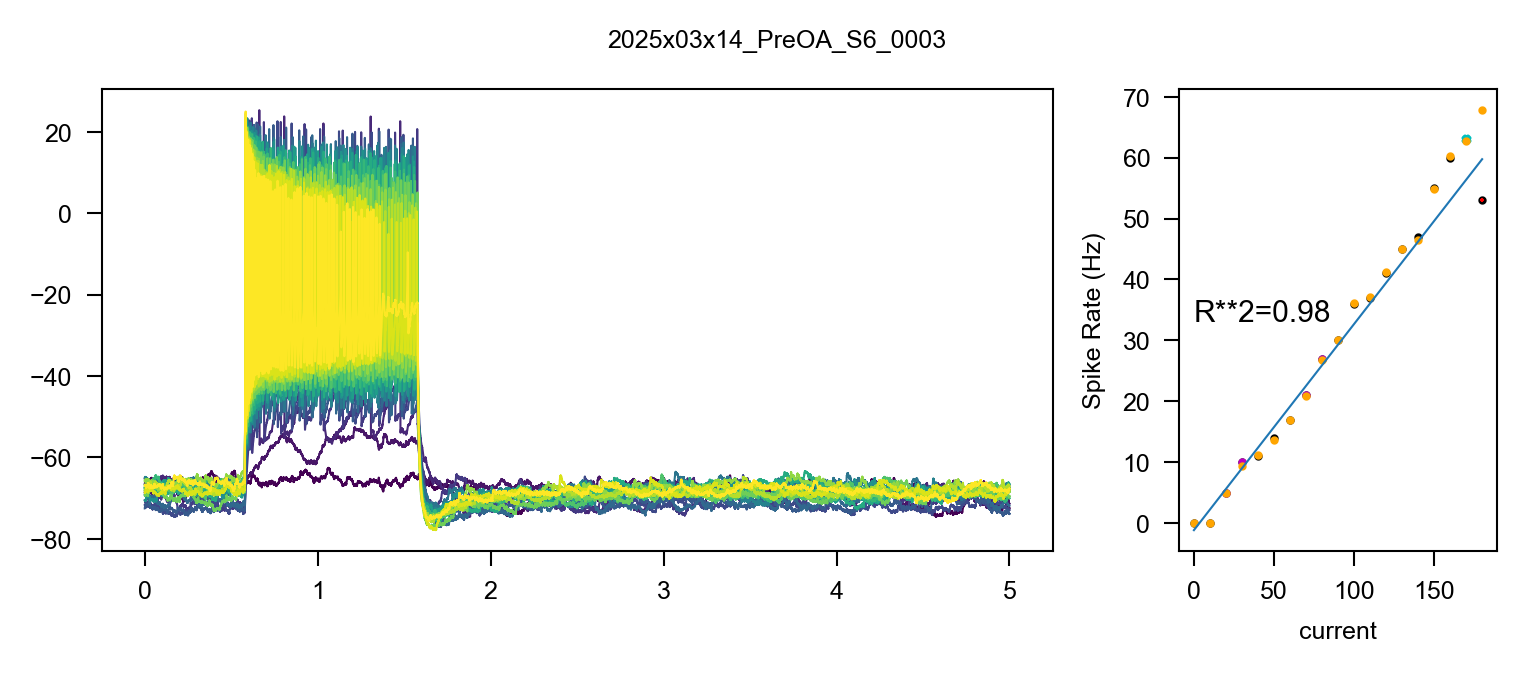

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  70%|█████████████████████████████████████▊                | 7/10 [00:42<00:19,  6.35s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


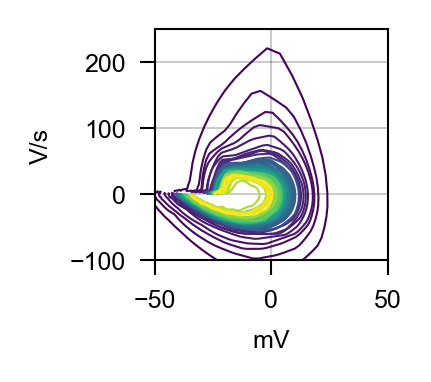

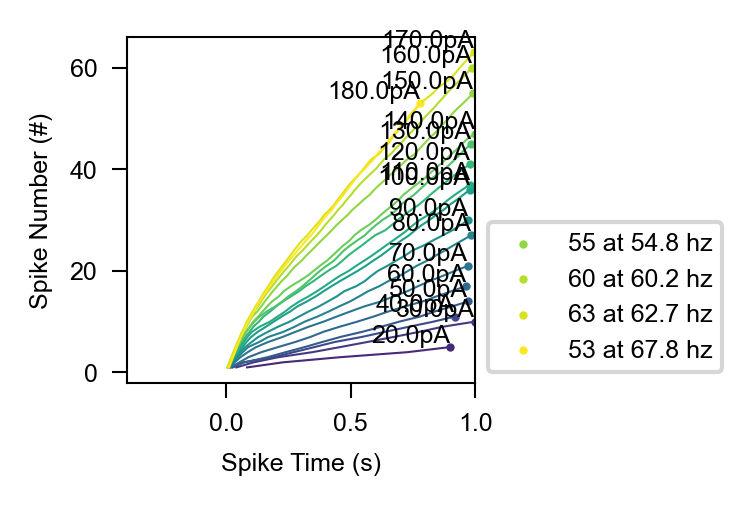

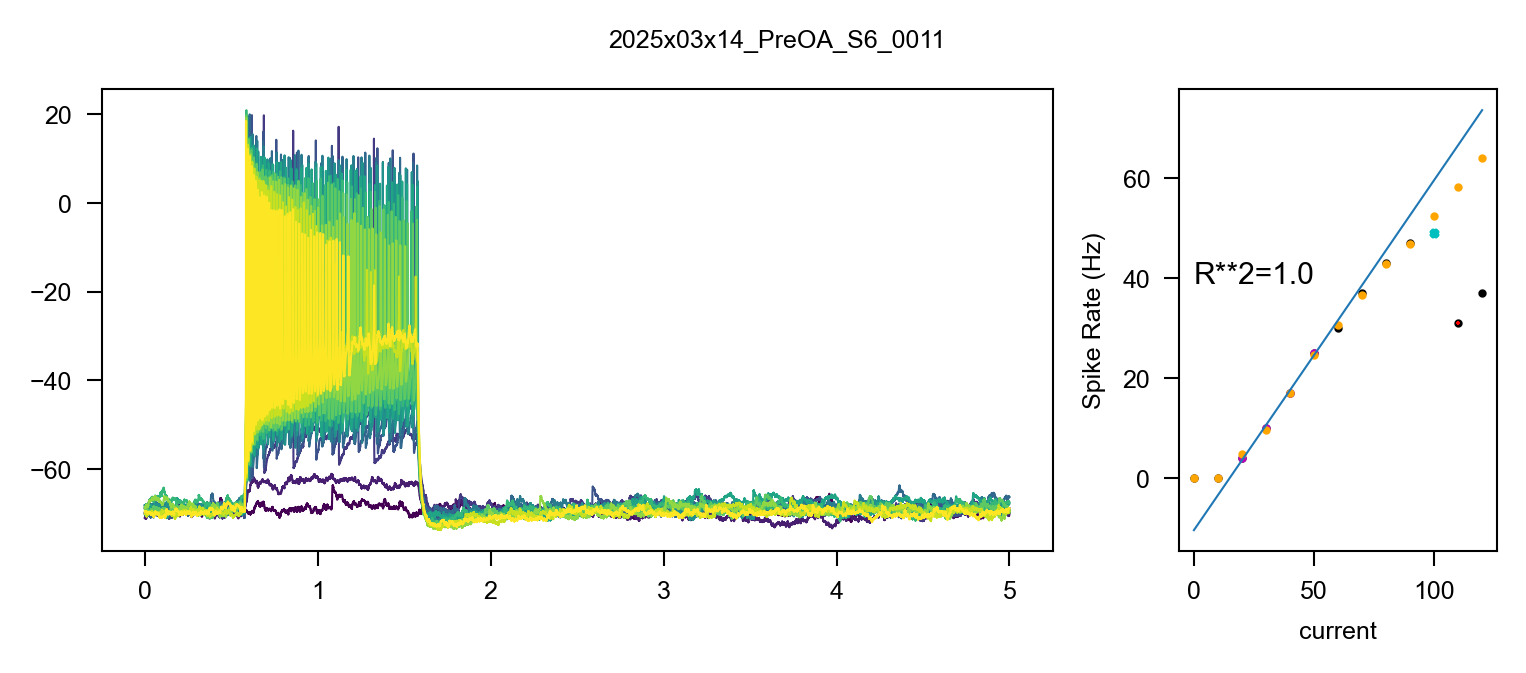

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  80%|███████████████████████████████████████████▏          | 8/10 [00:49<00:12,  6.47s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


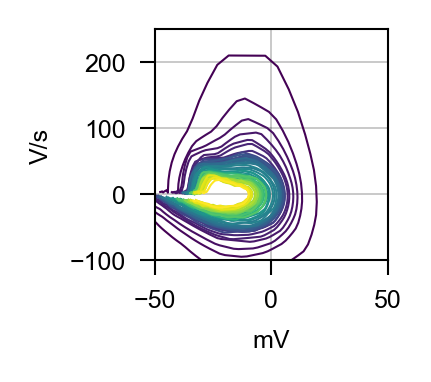

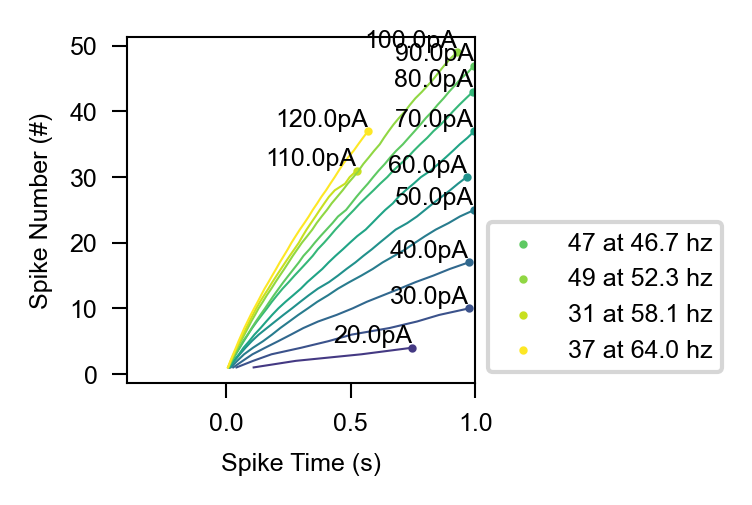

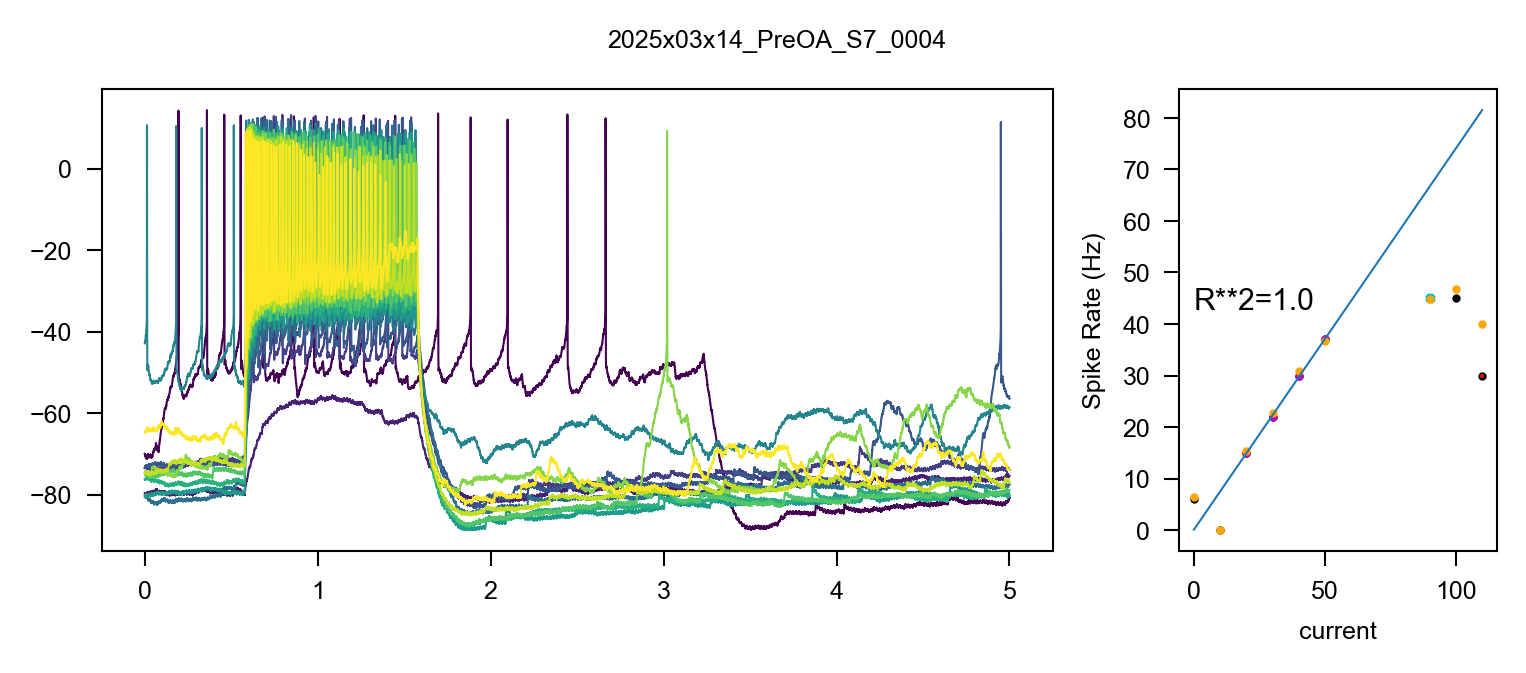

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  90%|████████████████████████████████████████████████▌     | 9/10 [00:55<00:06,  6.45s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


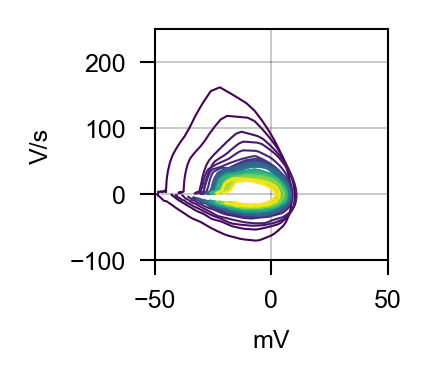

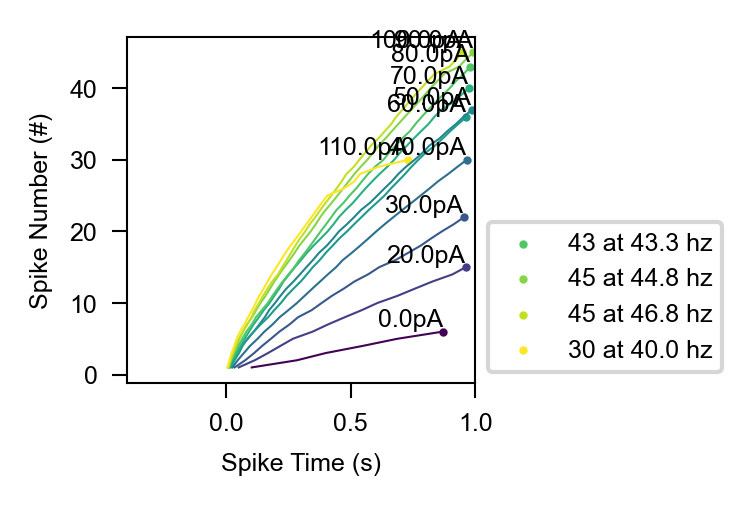

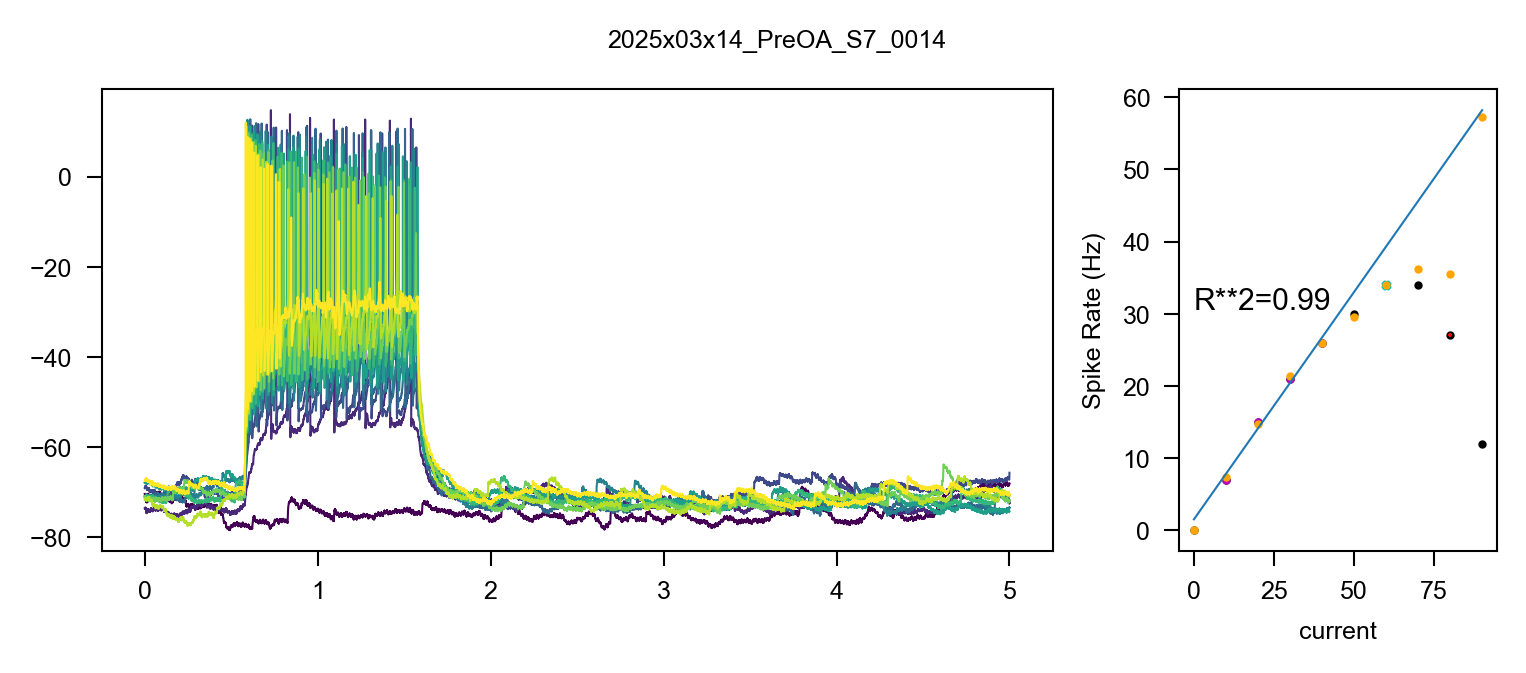

C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Latentcy 800pA-1s:   0%|                                                          | 0/9 [00:00<?, ?it/s]

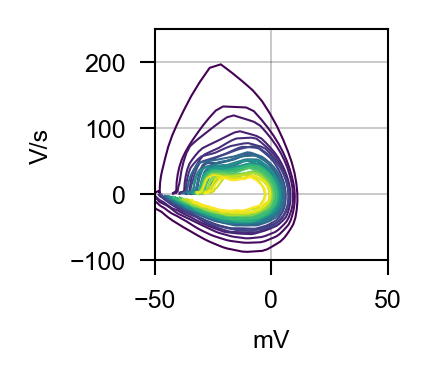

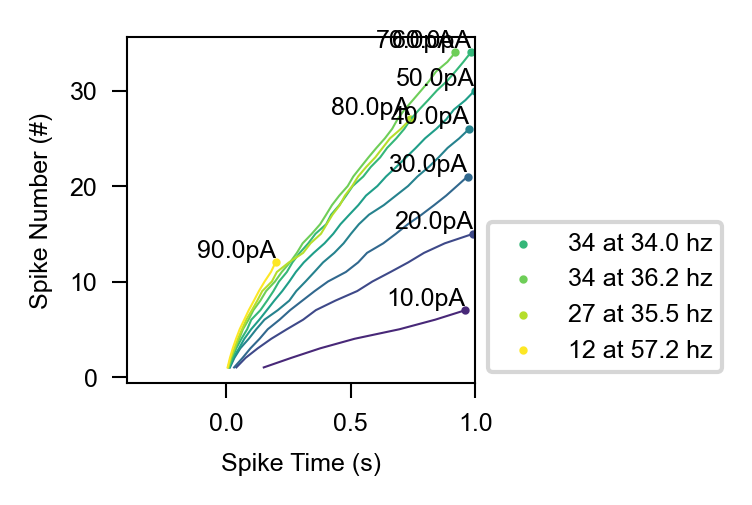

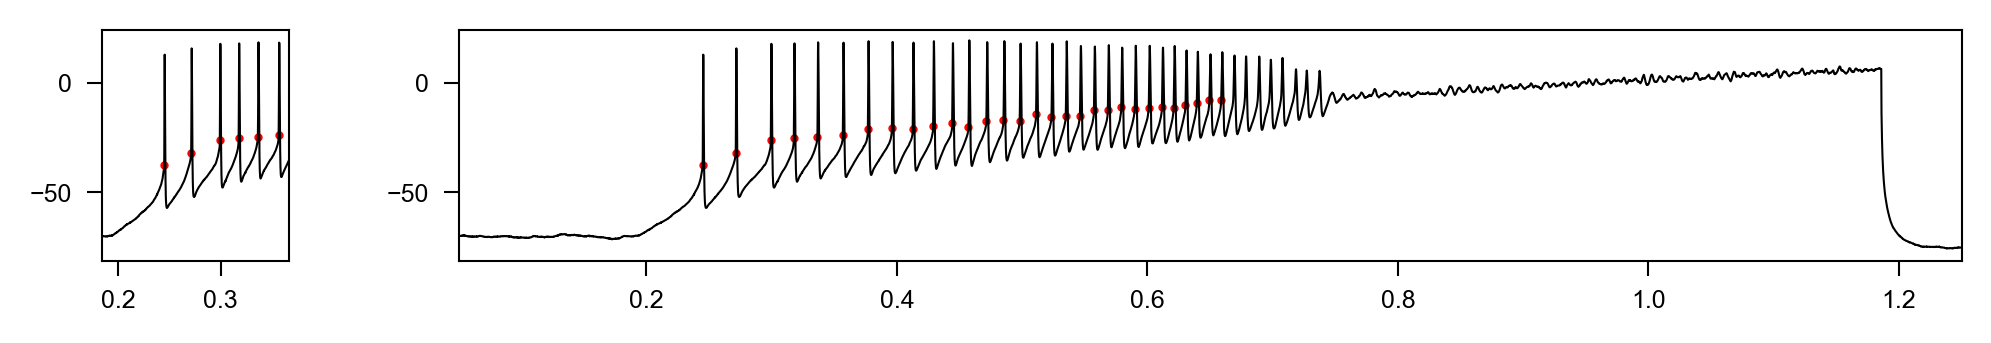

Analyzing IC - Latentcy 800pA-1s:  11%|█████▌                                            | 1/9 [00:01<00:09,  1.24s/it]

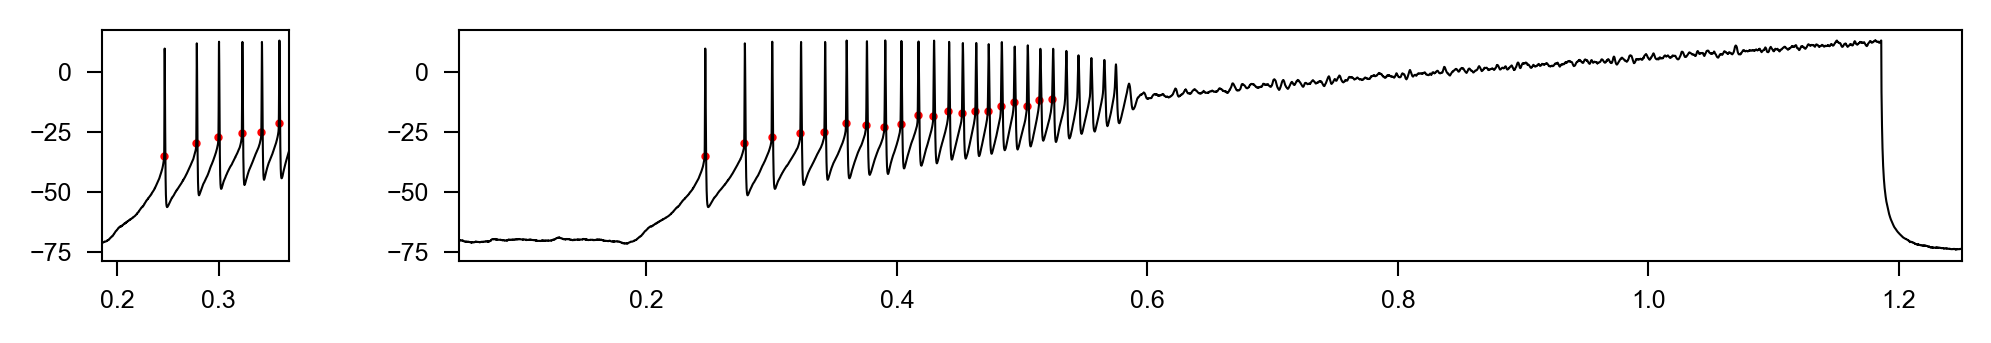

Analyzing IC - Latentcy 800pA-1s:  22%|███████████                                       | 2/9 [00:02<00:07,  1.02s/it]

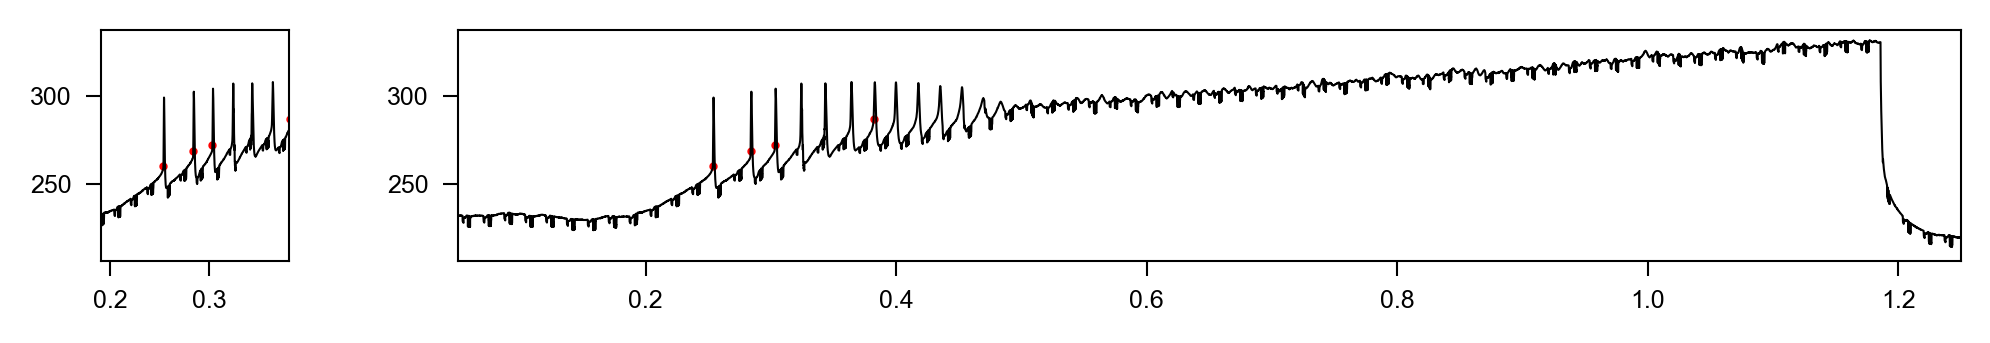

Analyzing IC - Latentcy 800pA-1s:  33%|████████████████▋                                 | 3/9 [00:02<00:05,  1.07it/s]

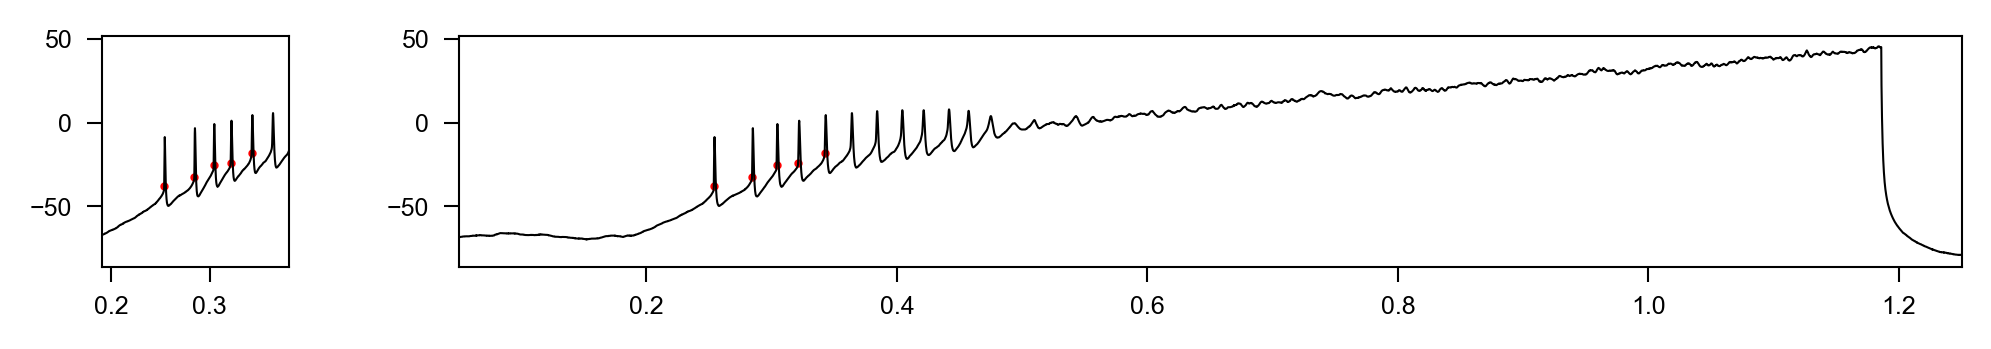

Analyzing IC - Latentcy 800pA-1s:  44%|██████████████████████▏                           | 4/9 [00:03<00:04,  1.11it/s]

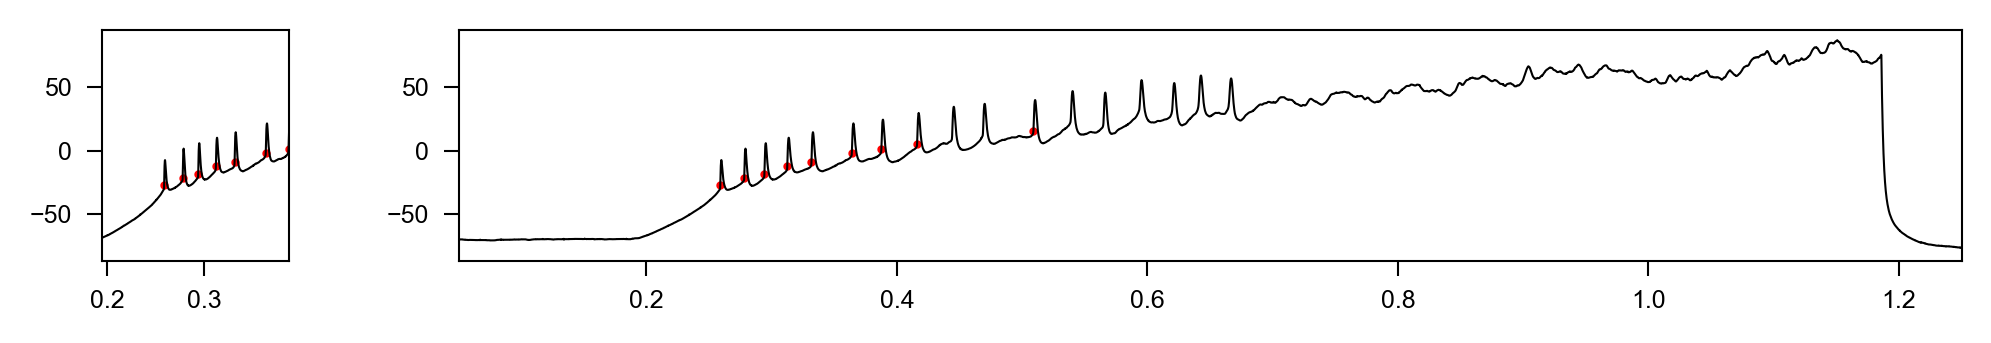

Analyzing IC - Latentcy 800pA-1s:  56%|███████████████████████████▊                      | 5/9 [00:04<00:03,  1.13it/s]

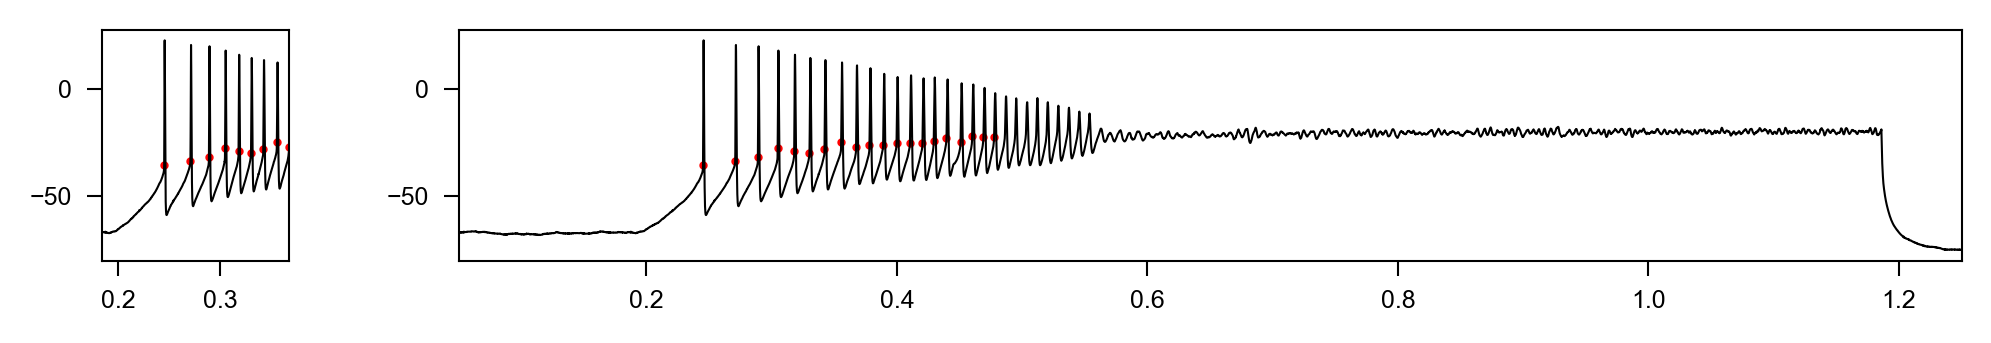

Analyzing IC - Latentcy 800pA-1s:  67%|█████████████████████████████████▎                | 6/9 [00:05<00:02,  1.16it/s]

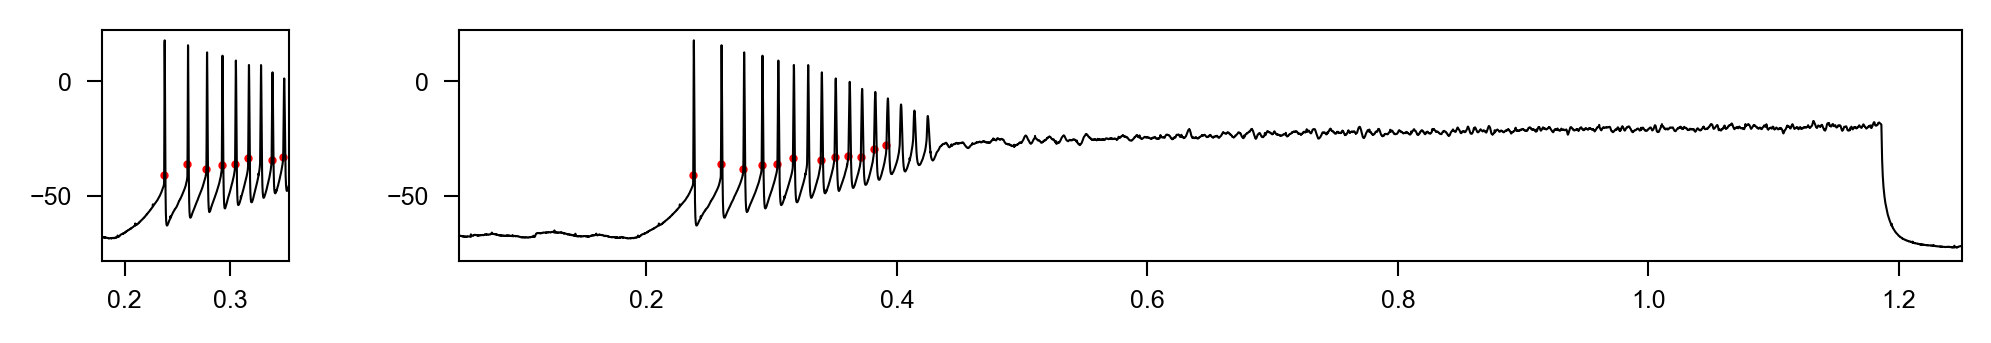

Analyzing IC - Latentcy 800pA-1s:  78%|██████████████████████████████████████▉           | 7/9 [00:06<00:01,  1.17it/s]

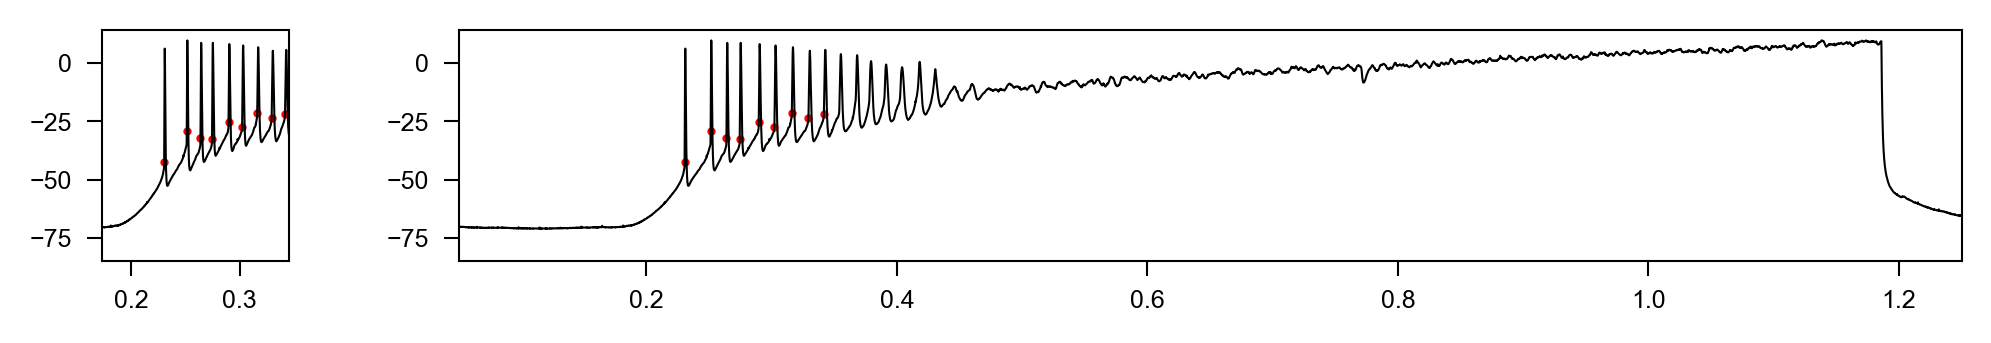

Analyzing IC - Latentcy 800pA-1s:  89%|████████████████████████████████████████████▍     | 8/9 [00:07<00:00,  1.17it/s]

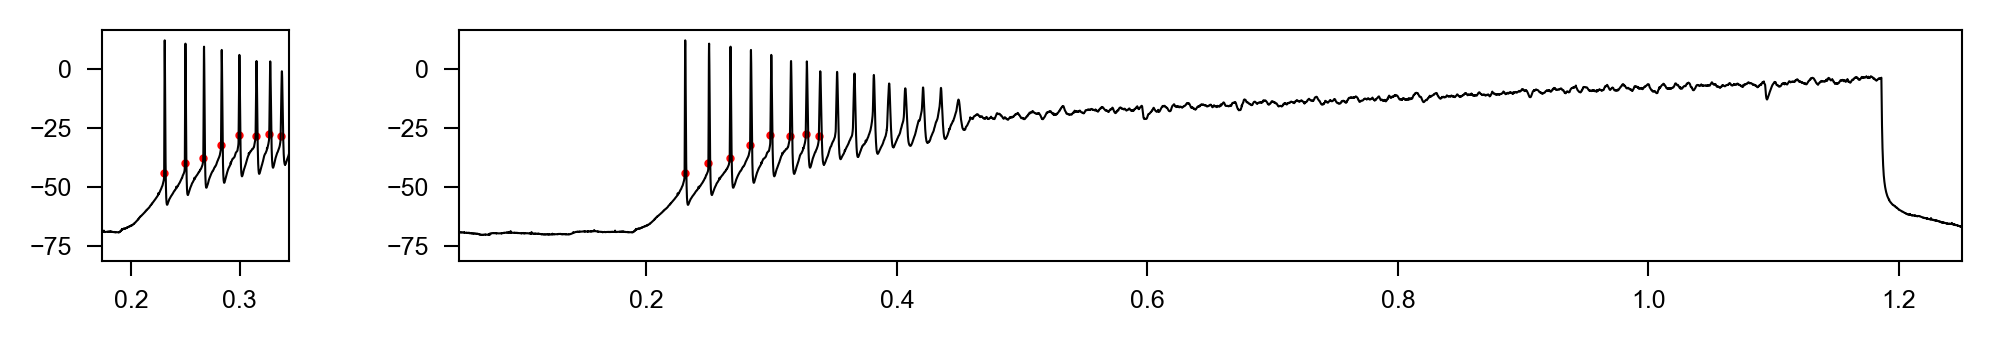

Analyzing IC - Rheobase:   0%|                                                                   | 0/8 [00:00<?, ?it/s]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


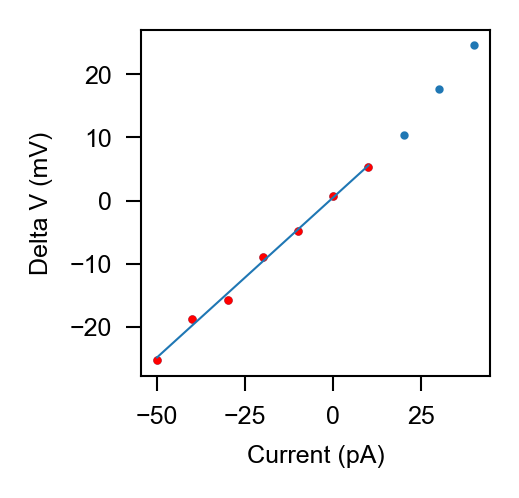

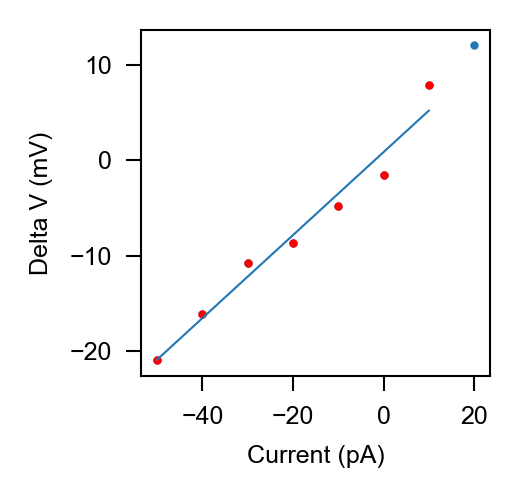

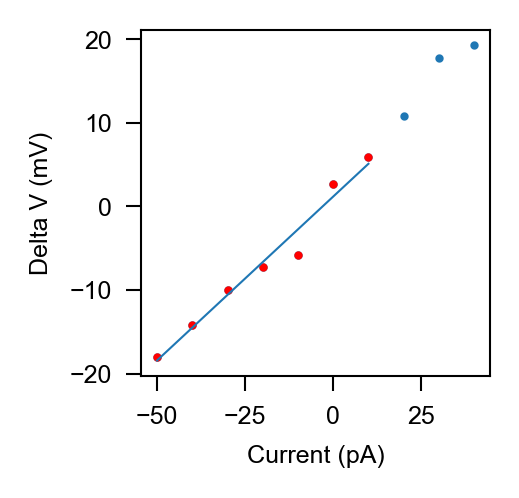

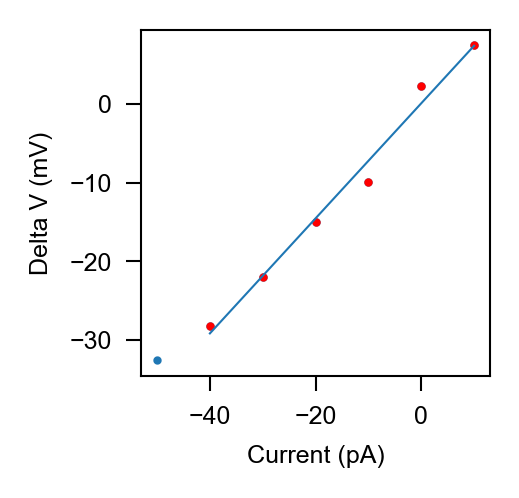

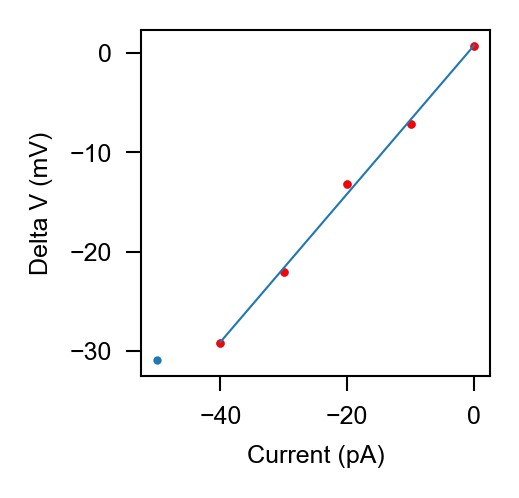

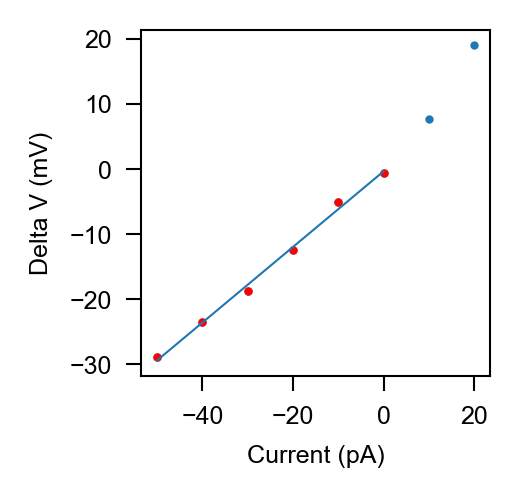

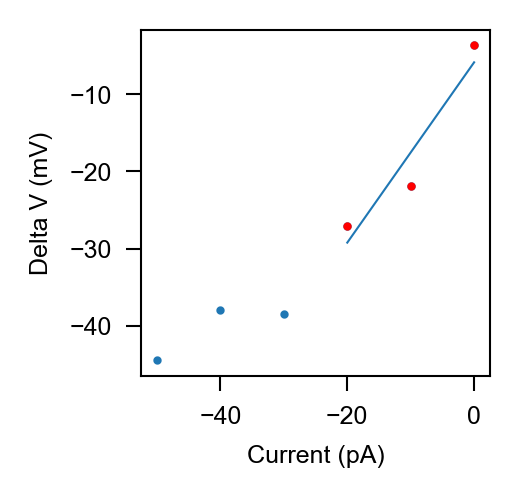

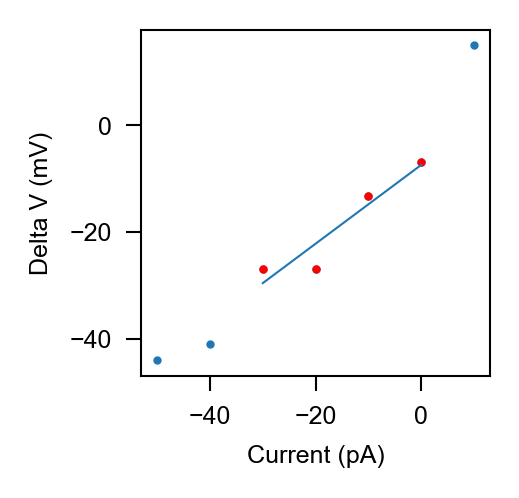

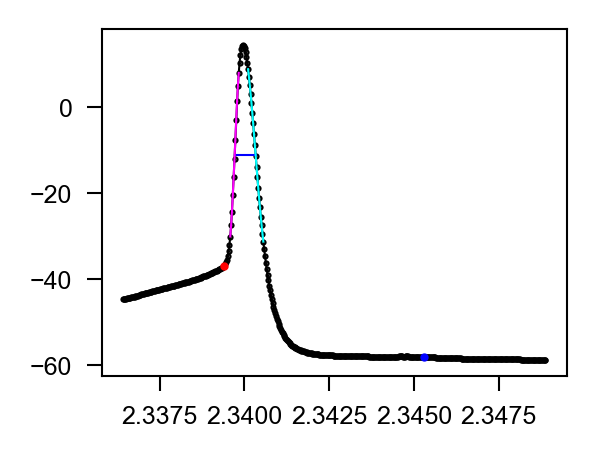

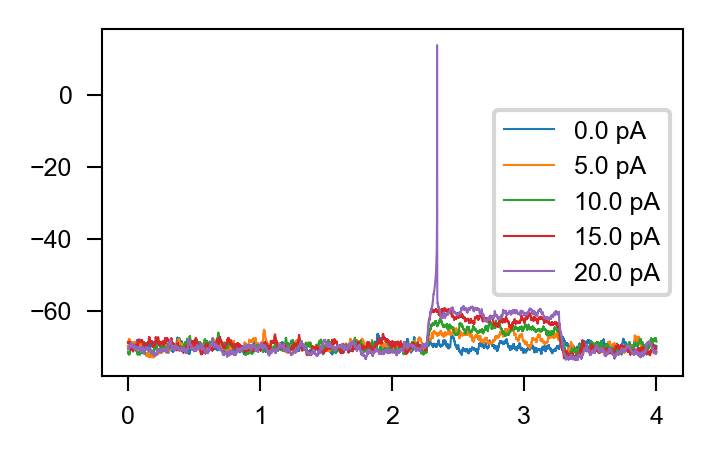

Analyzing IC - Rheobase:  12%|███████▍                                                   | 1/8 [00:04<00:32,  4.71s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

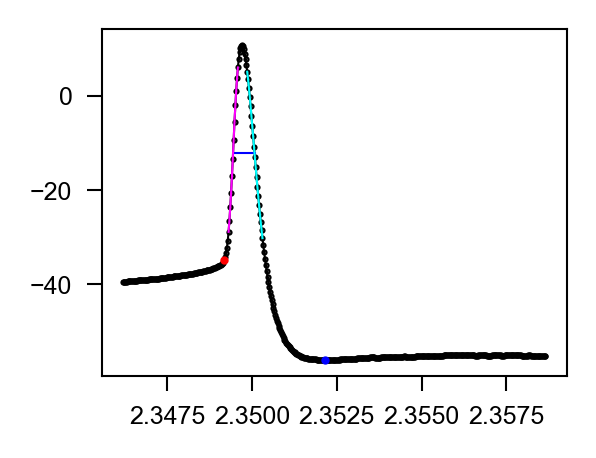

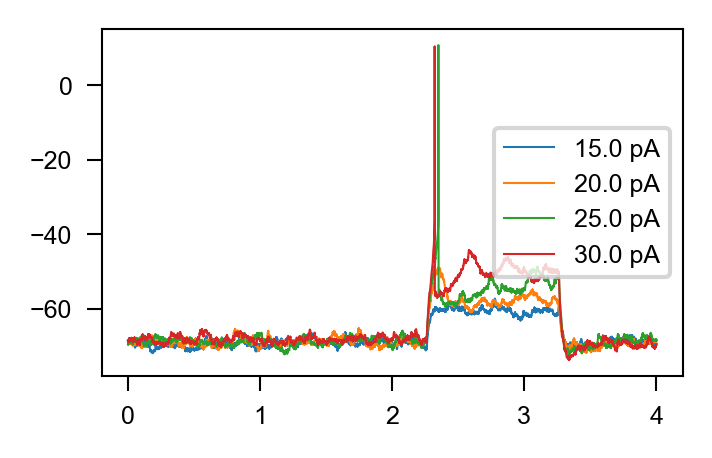

Analyzing IC - Rheobase:  25%|██████████████▊                                            | 2/8 [00:07<00:22,  3.73s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

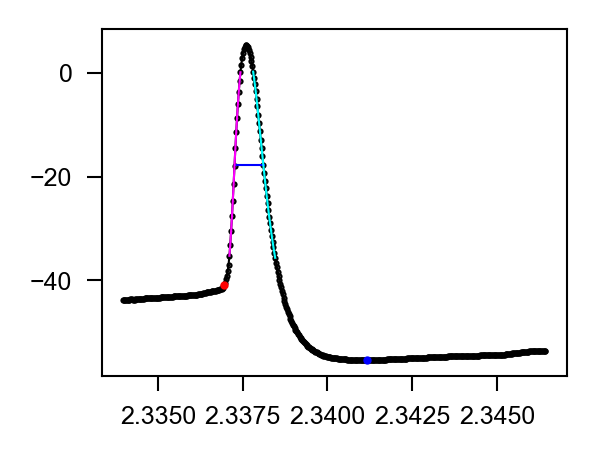

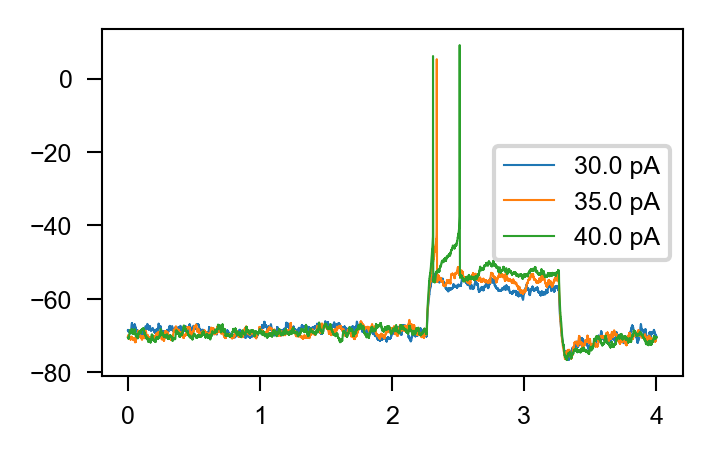

Analyzing IC - Rheobase:  38%|██████████████████████▏                                    | 3/8 [00:10<00:16,  3.27s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

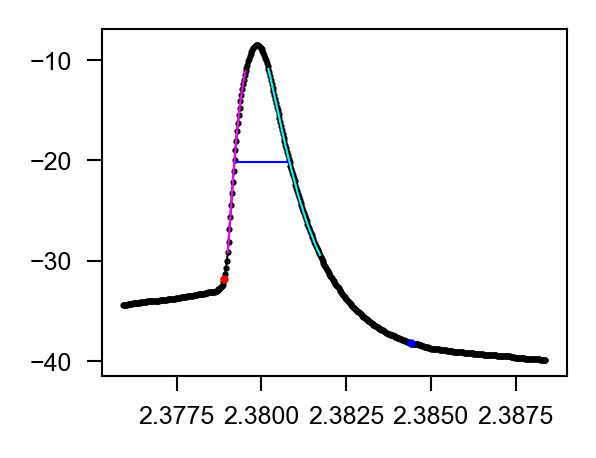

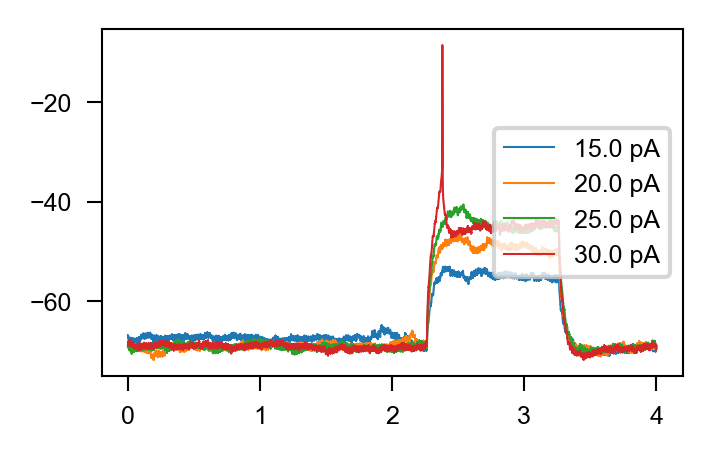

Analyzing IC - Rheobase:  50%|█████████████████████████████▌                             | 4/8 [00:13<00:12,  3.22s/it]C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denni\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

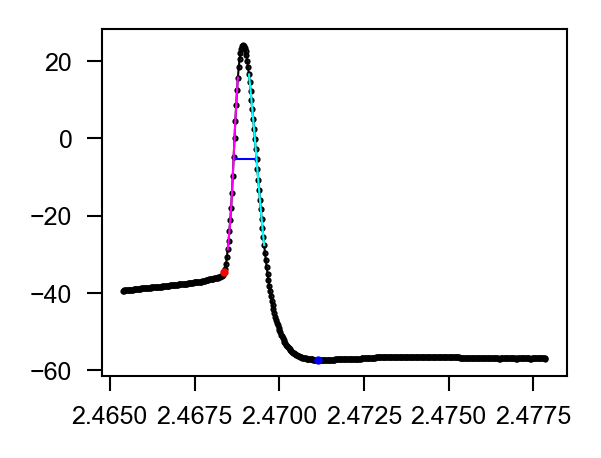

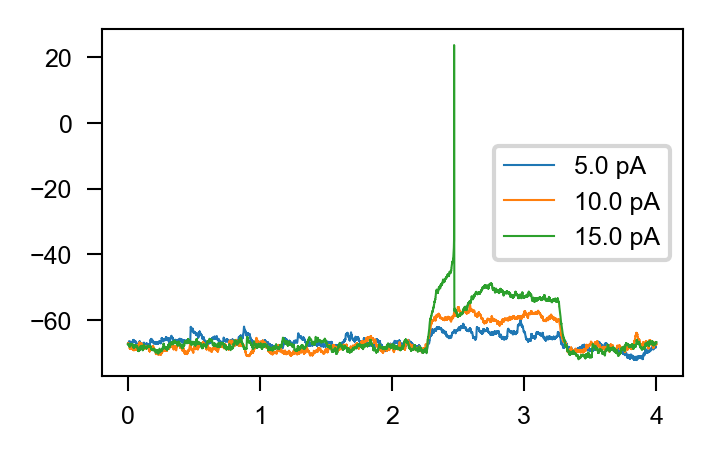

Analyzing IC - Rheobase:  62%|████████████████████████████████████▉                      | 5/8 [00:16<00:09,  3.06s/it]C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

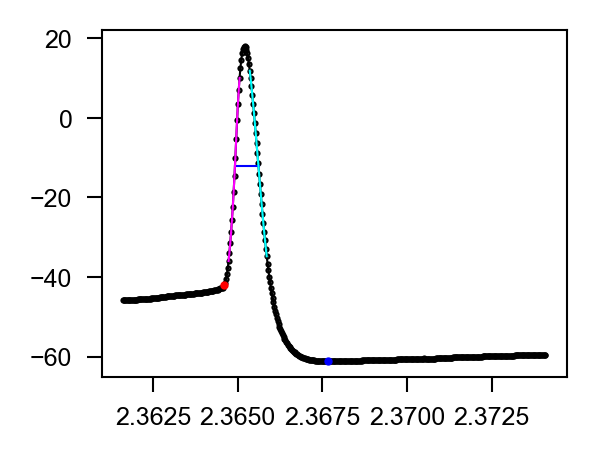

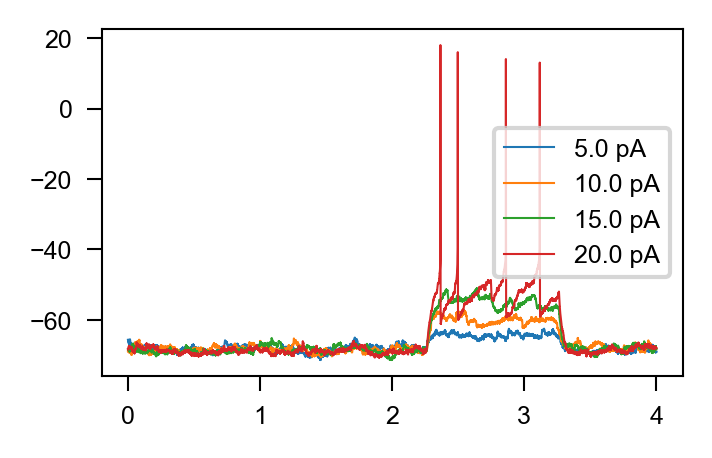

Analyzing IC - Rheobase:  75%|████████████████████████████████████████████▎              | 6/8 [00:19<00:06,  3.04s/it]C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

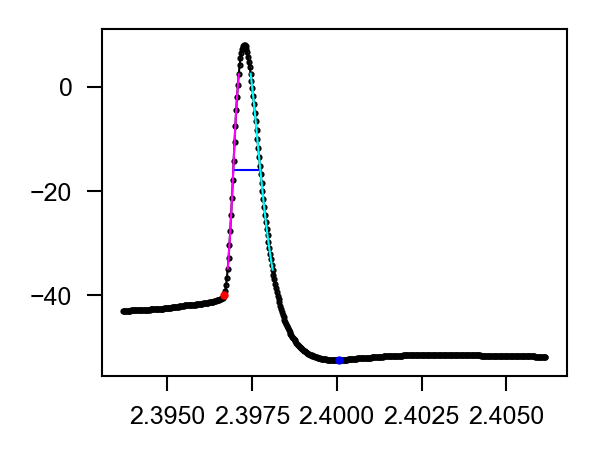

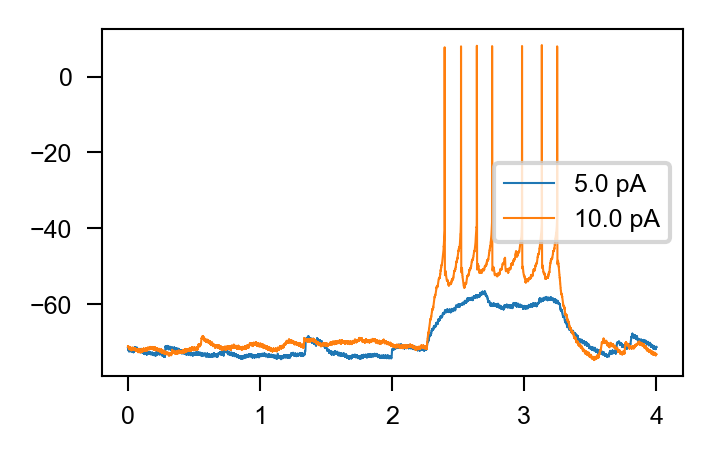

Analyzing IC - Rheobase:  88%|███████████████████████████████████████████████████▋       | 7/8 [00:21<00:02,  2.87s/it]C:\Users\denni\AppData\Local\Temp\ipykernel_1532\3765035769.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 450x450 with 0 Axes>

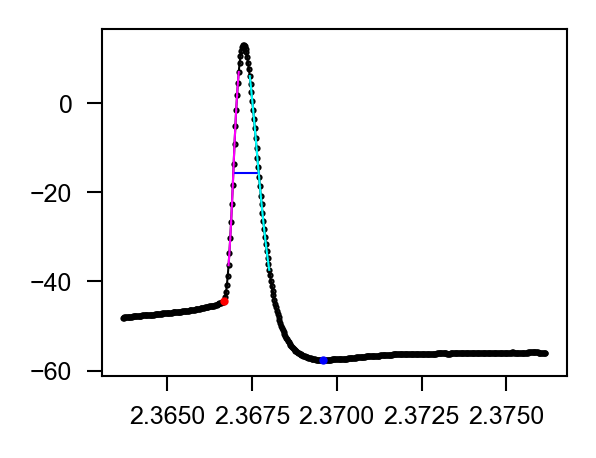

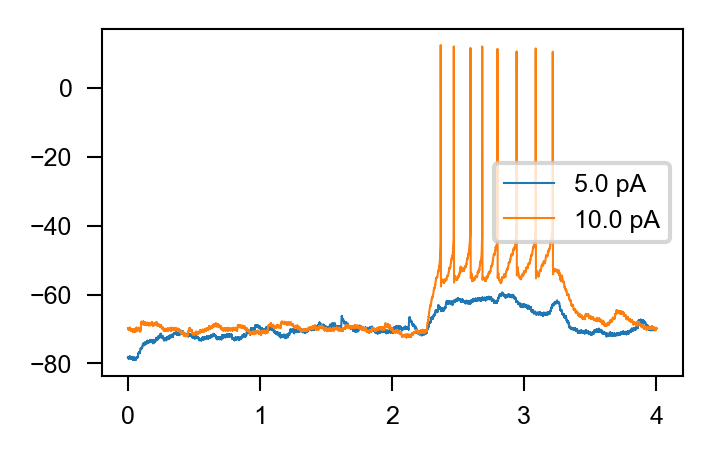

Analyzing VC - MemTest-10ms-160ms:   0%|                                                        | 0/11 [00:00<?, ?it/s]

<Figure size 450x450 with 0 Axes>

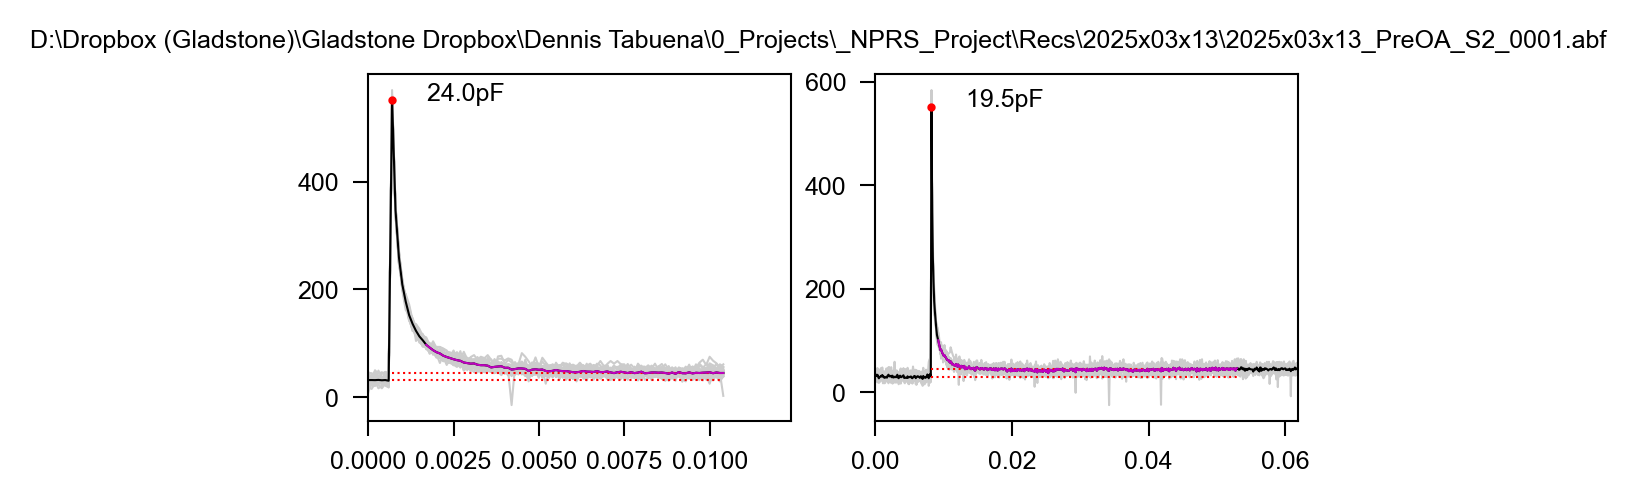

Analyzing VC - MemTest-10ms-160ms:   9%|████▎                                           | 1/11 [00:01<00:18,  1.90s/it]

<Figure size 450x450 with 0 Axes>

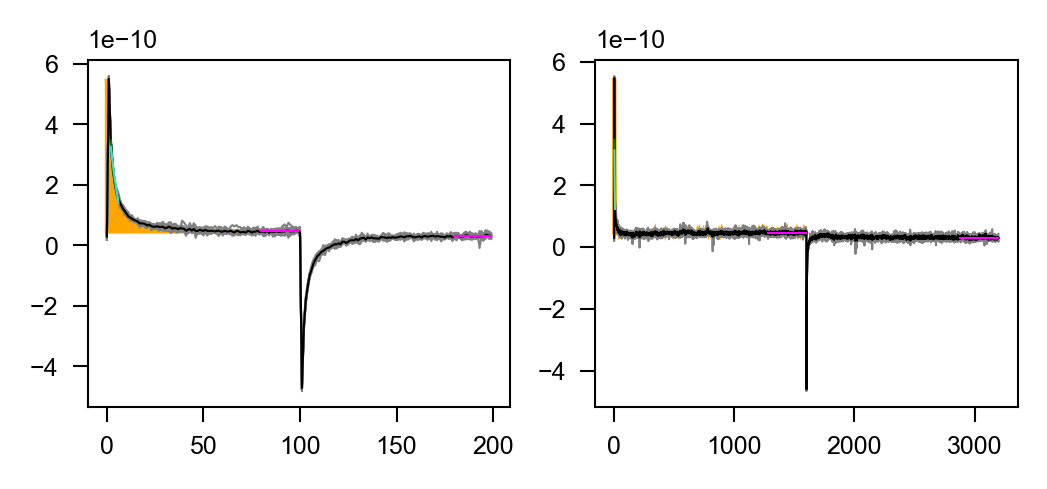

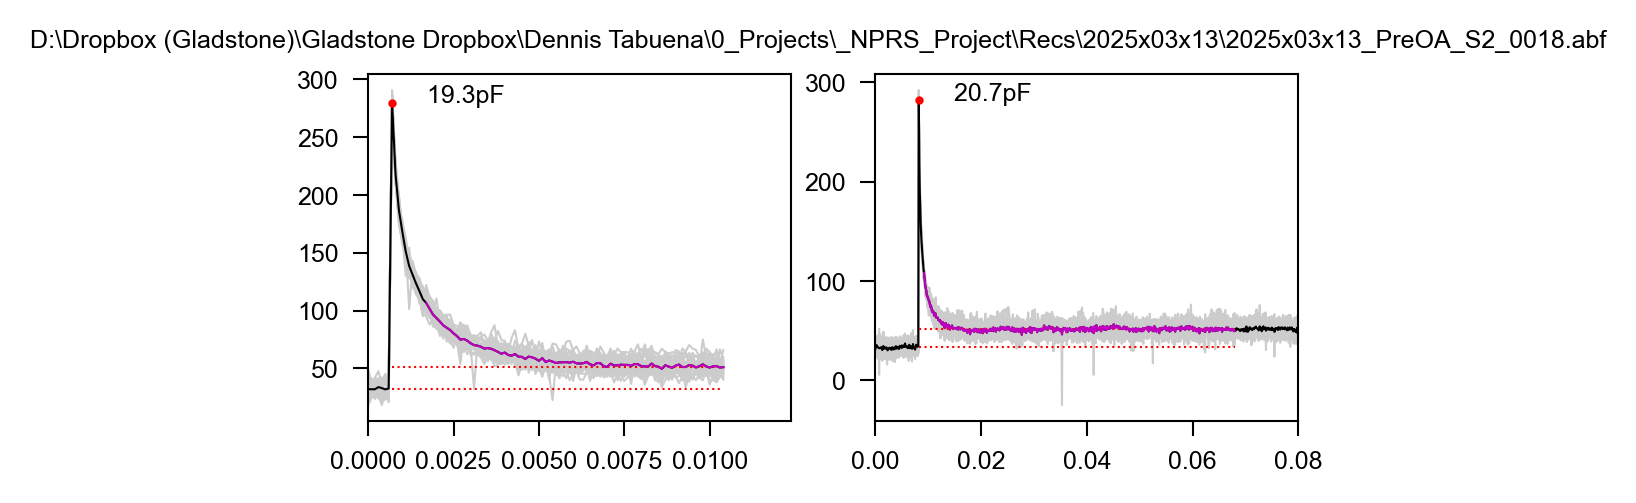

Analyzing VC - MemTest-10ms-160ms:  18%|████████▋                                       | 2/11 [00:03<00:16,  1.78s/it]

<Figure size 450x450 with 0 Axes>

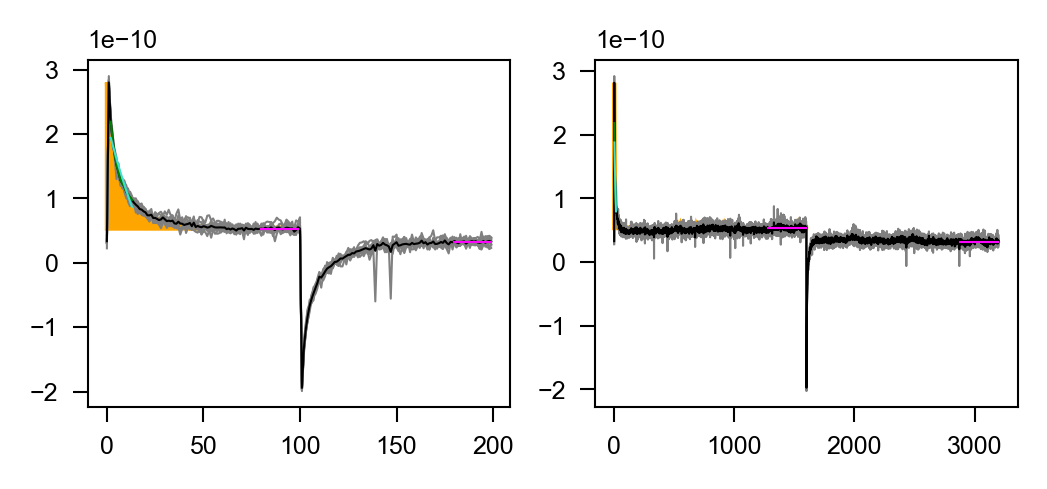

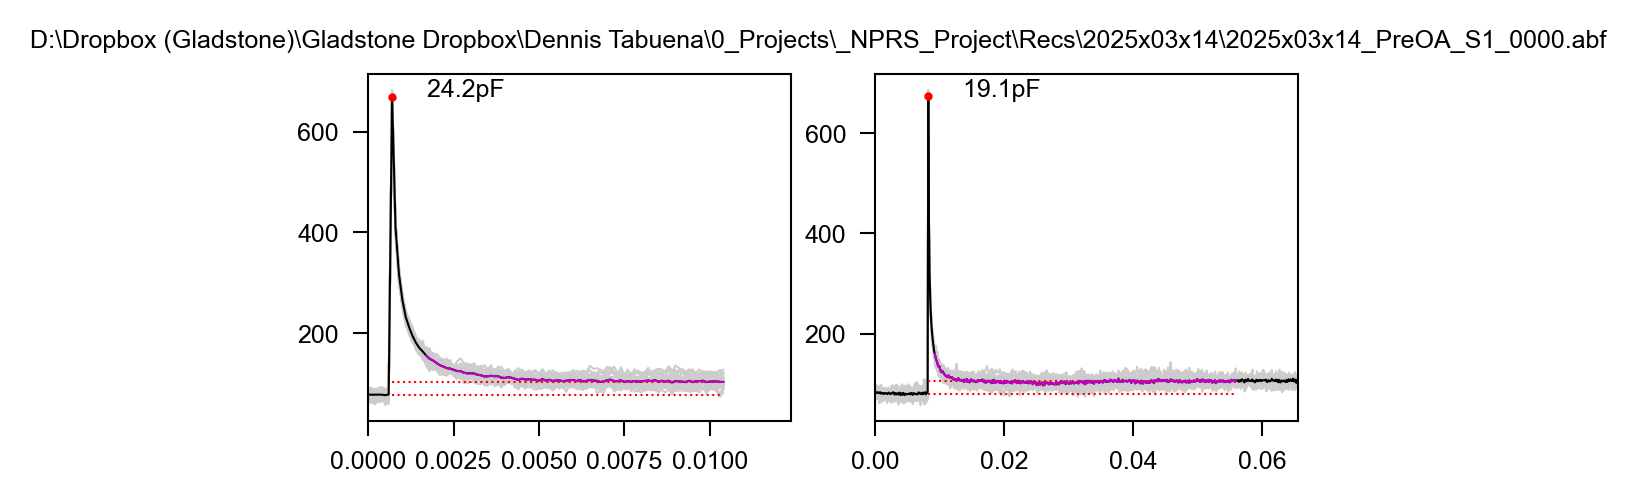

Analyzing VC - MemTest-10ms-160ms:  27%|█████████████                                   | 3/11 [00:05<00:13,  1.70s/it]

<Figure size 450x450 with 0 Axes>

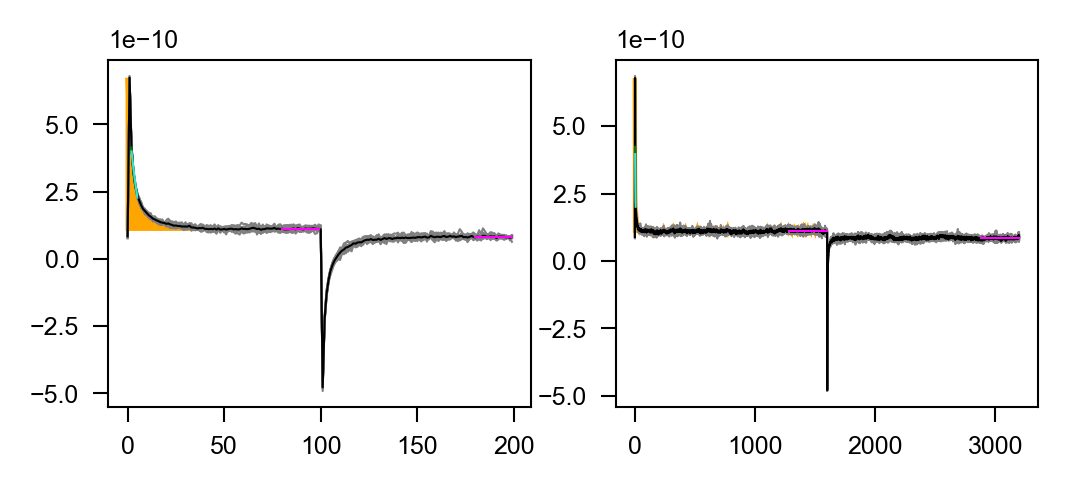

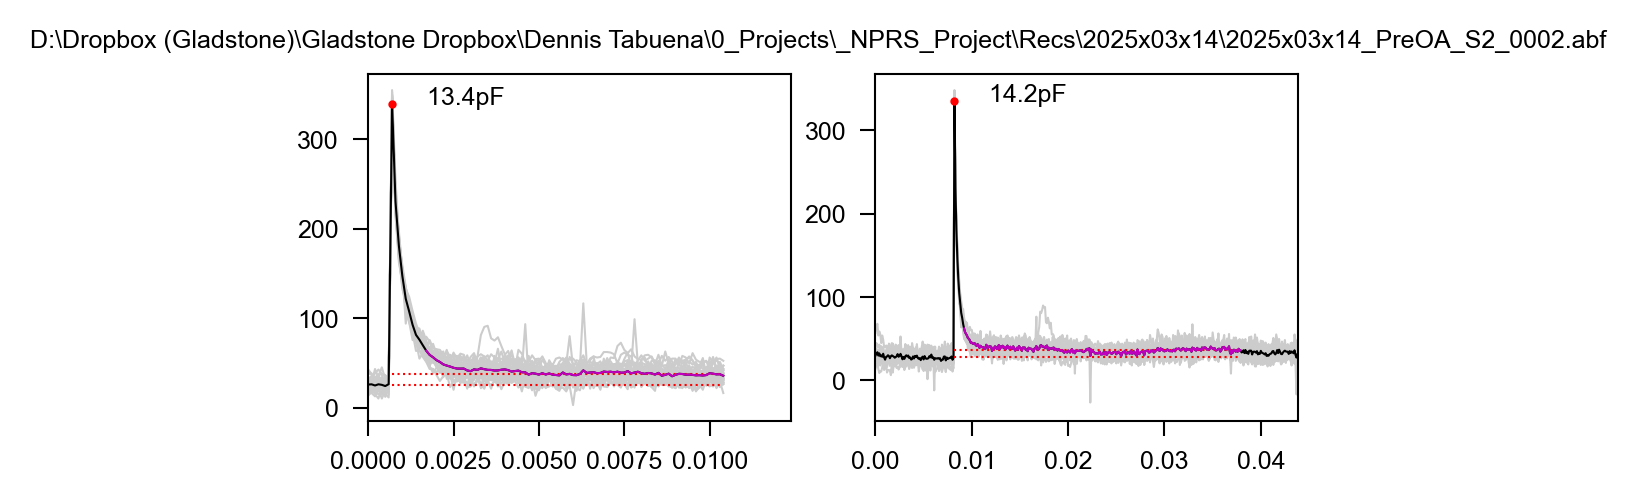

Analyzing VC - MemTest-10ms-160ms:  36%|█████████████████▍                              | 4/11 [00:06<00:11,  1.68s/it]

<Figure size 450x450 with 0 Axes>

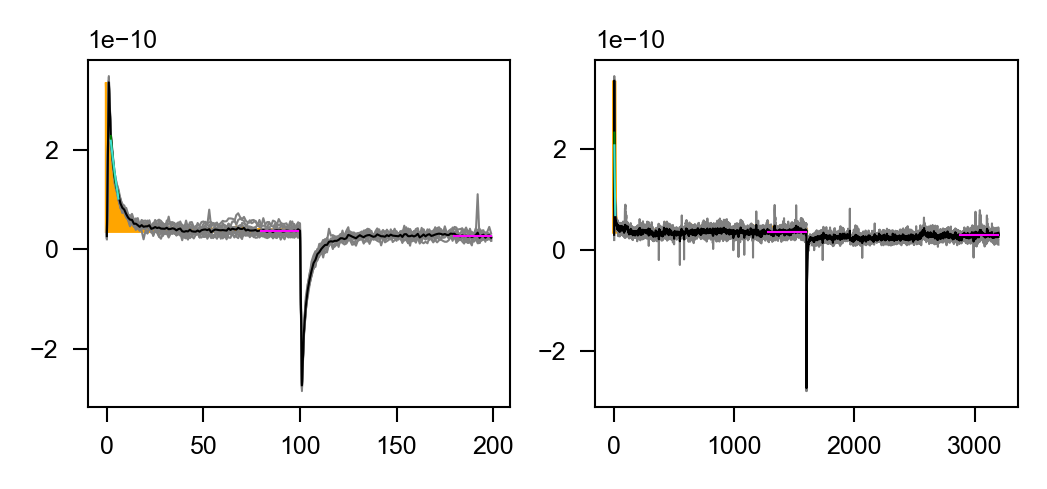

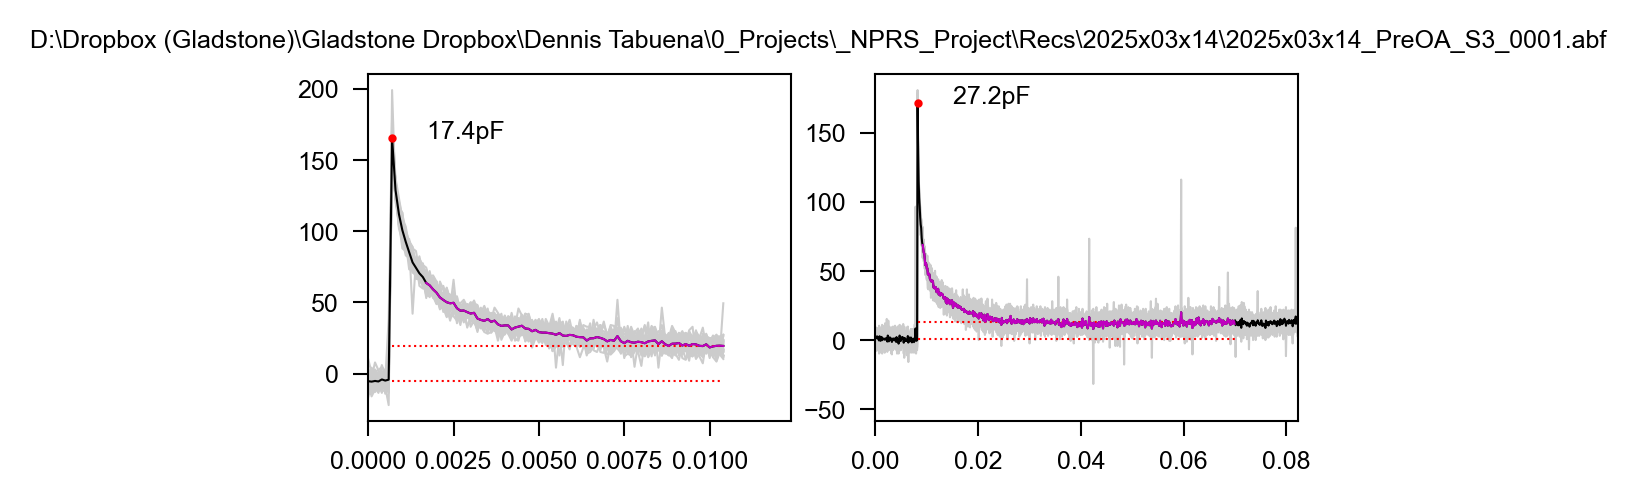

Analyzing VC - MemTest-10ms-160ms:  45%|█████████████████████▊                          | 5/11 [00:08<00:10,  1.67s/it]

<Figure size 450x450 with 0 Axes>

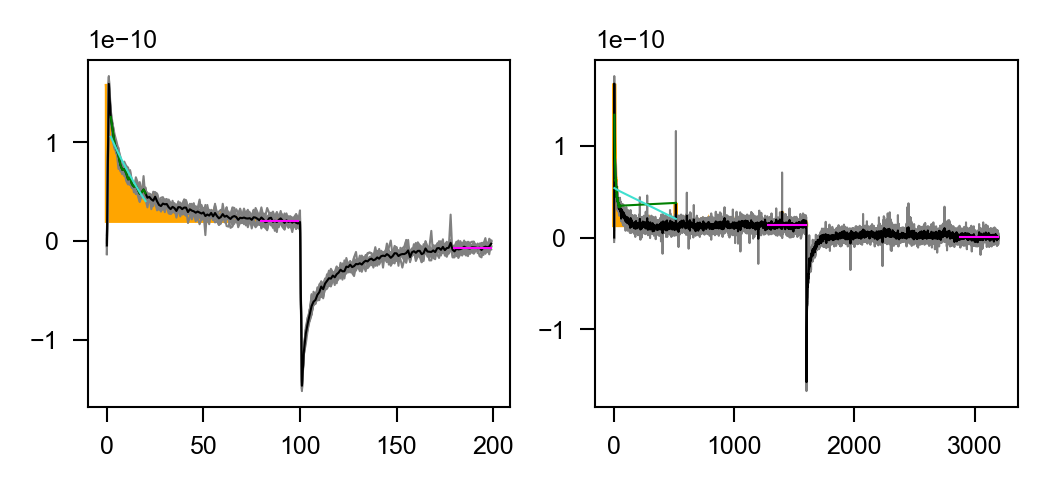

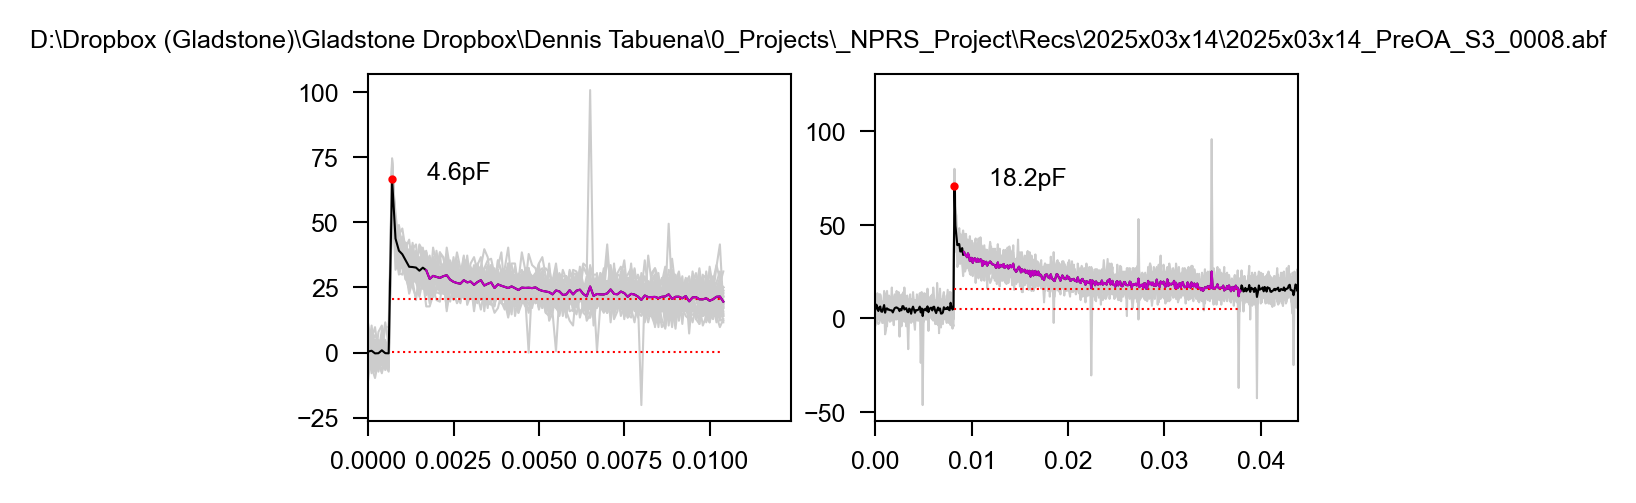

Analyzing VC - MemTest-10ms-160ms:  55%|██████████████████████████▏                     | 6/11 [00:10<00:08,  1.68s/it]

<Figure size 450x450 with 0 Axes>

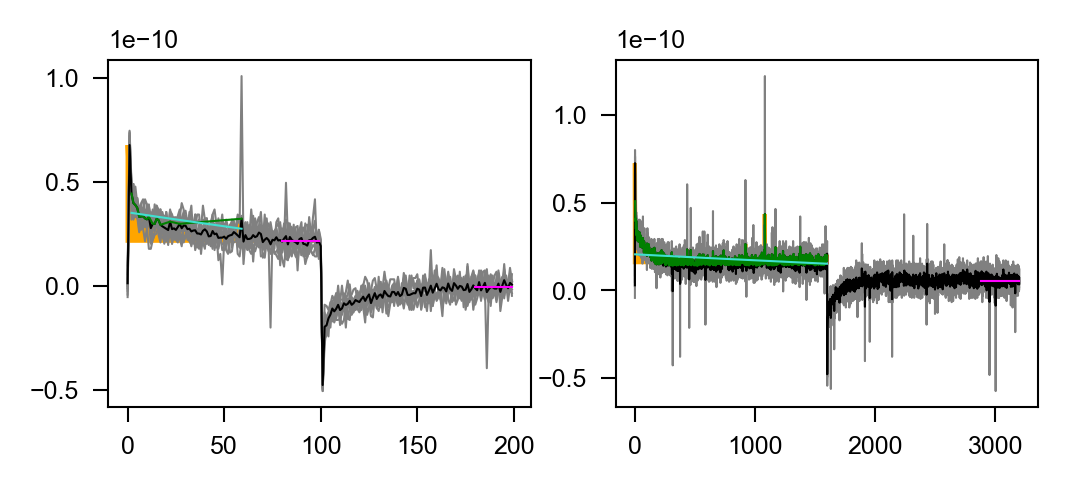

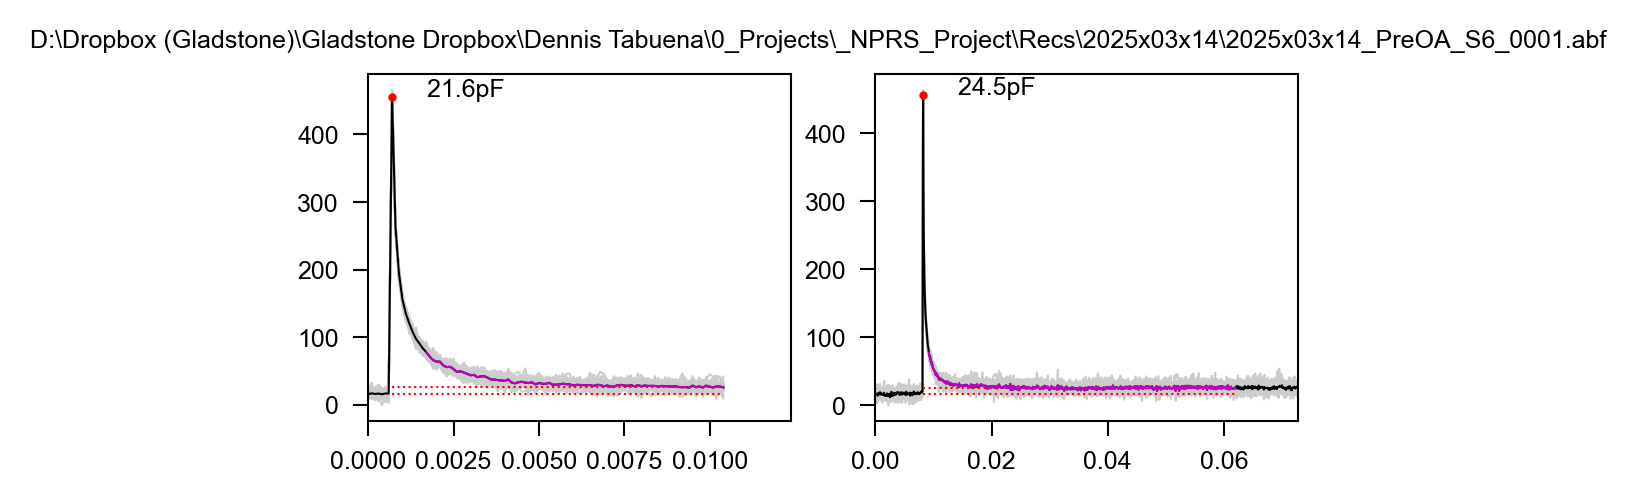

Analyzing VC - MemTest-10ms-160ms:  64%|██████████████████████████████▌                 | 7/11 [00:11<00:06,  1.68s/it]

<Figure size 450x450 with 0 Axes>

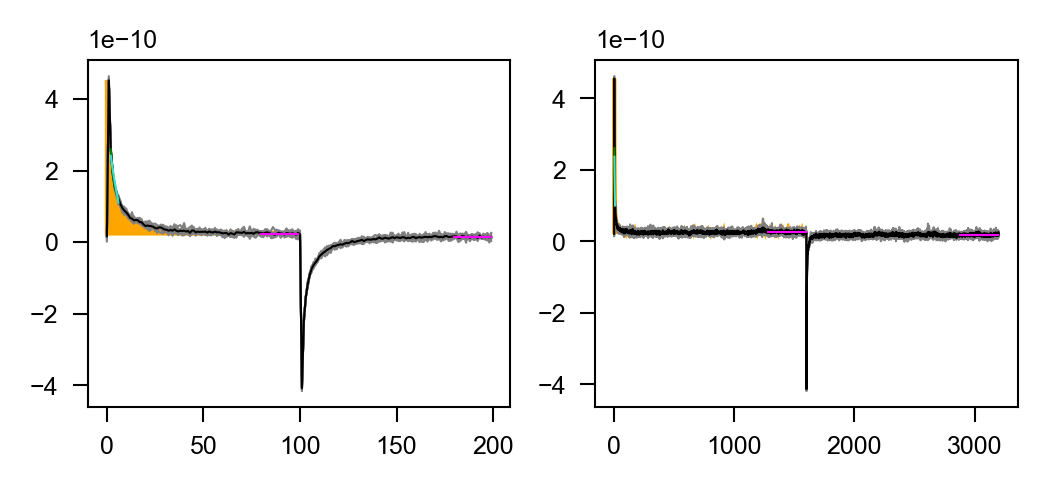

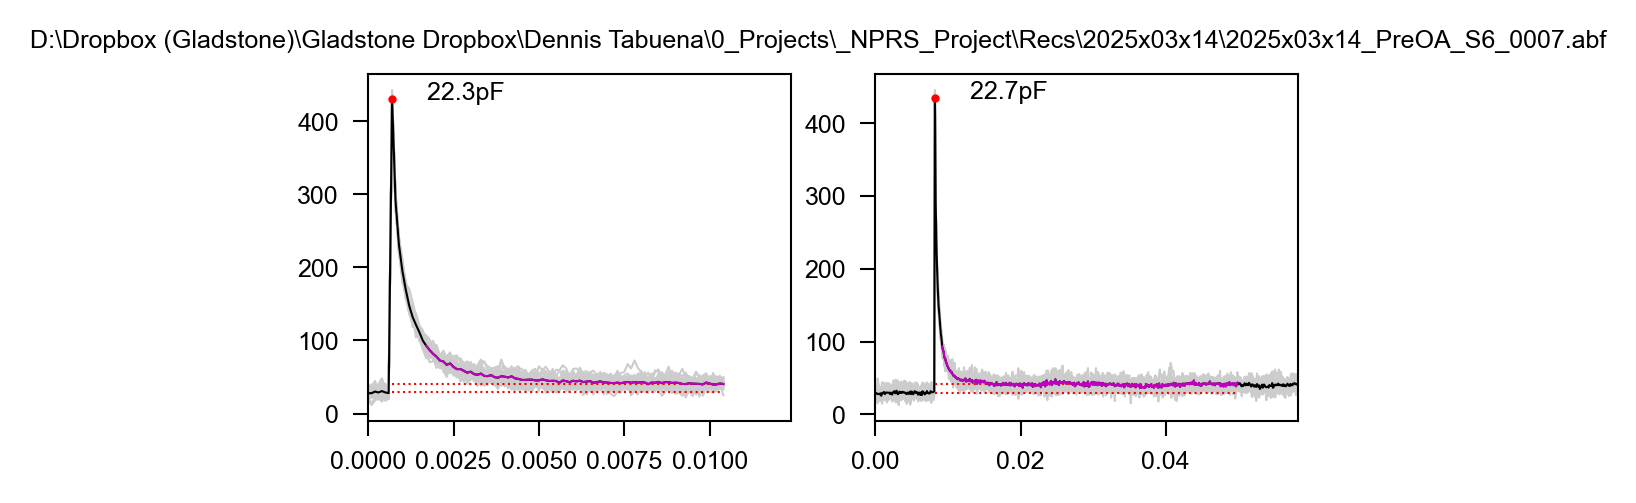

Analyzing VC - MemTest-10ms-160ms:  73%|██████████████████████████████████▉             | 8/11 [00:13<00:04,  1.66s/it]

<Figure size 450x450 with 0 Axes>

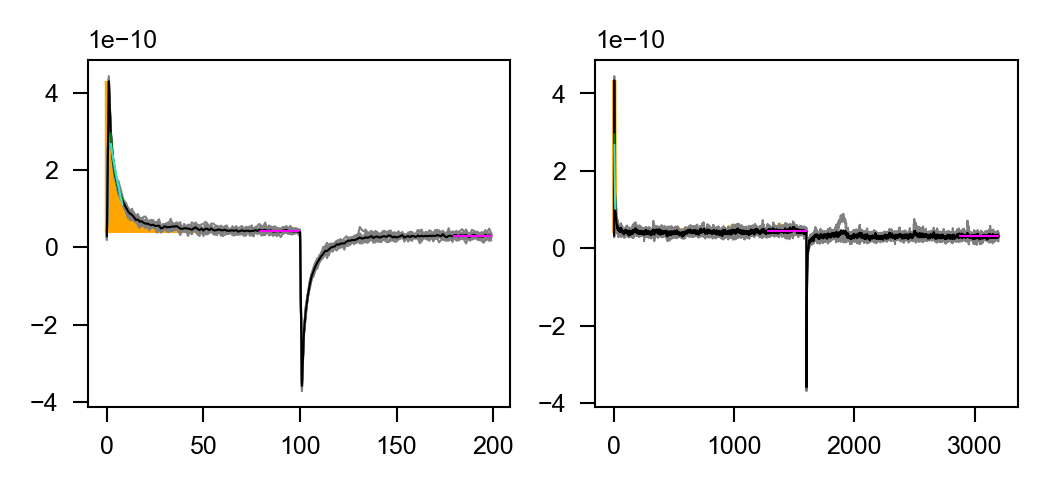

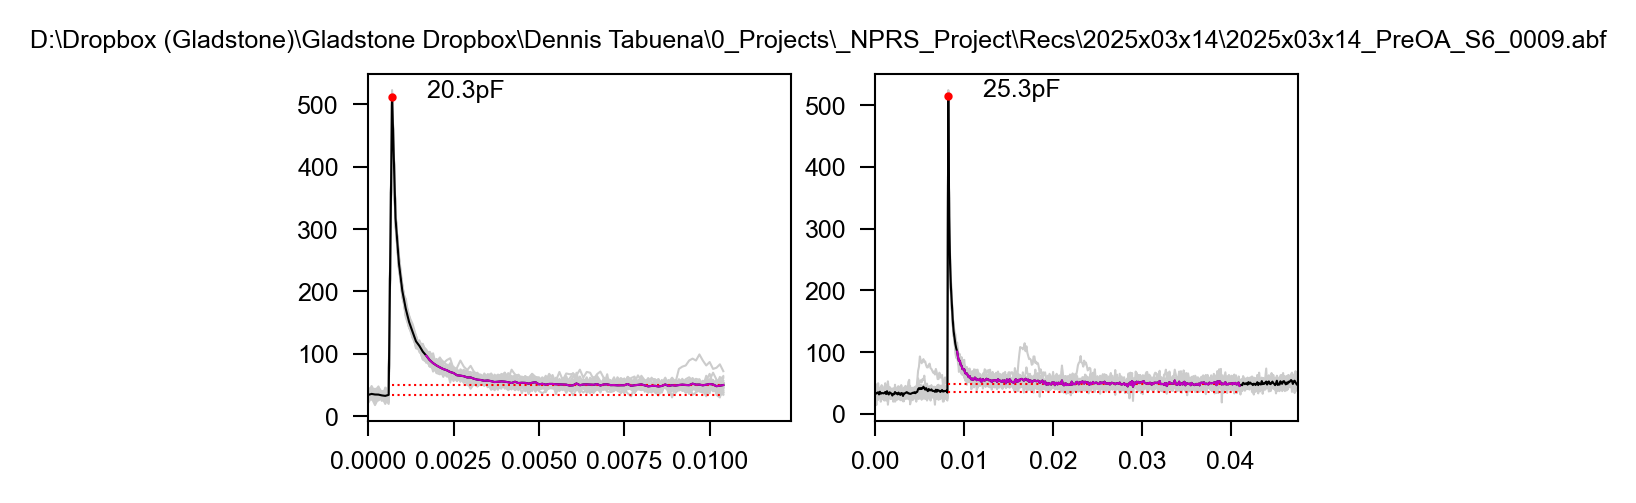

Analyzing VC - MemTest-10ms-160ms:  82%|███████████████████████████████████████▎        | 9/11 [00:15<00:03,  1.67s/it]

<Figure size 450x450 with 0 Axes>

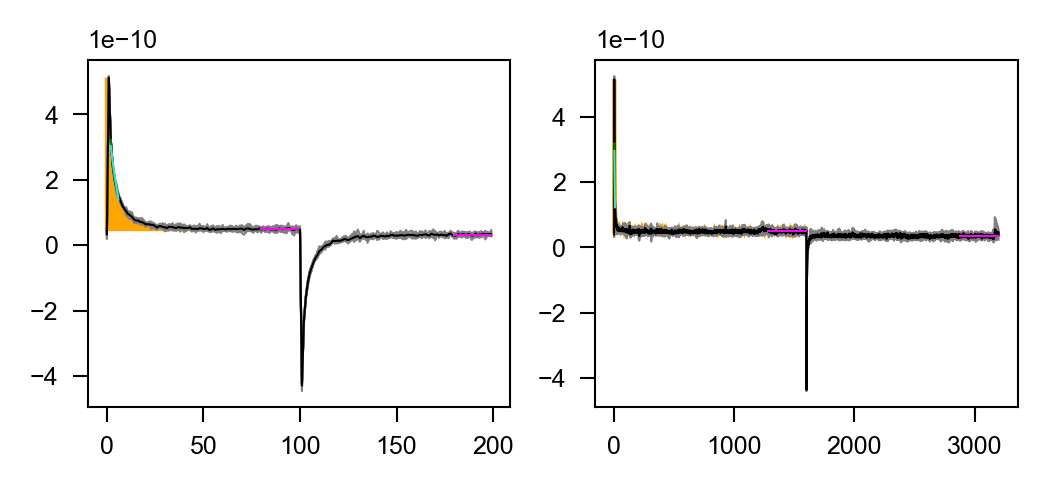

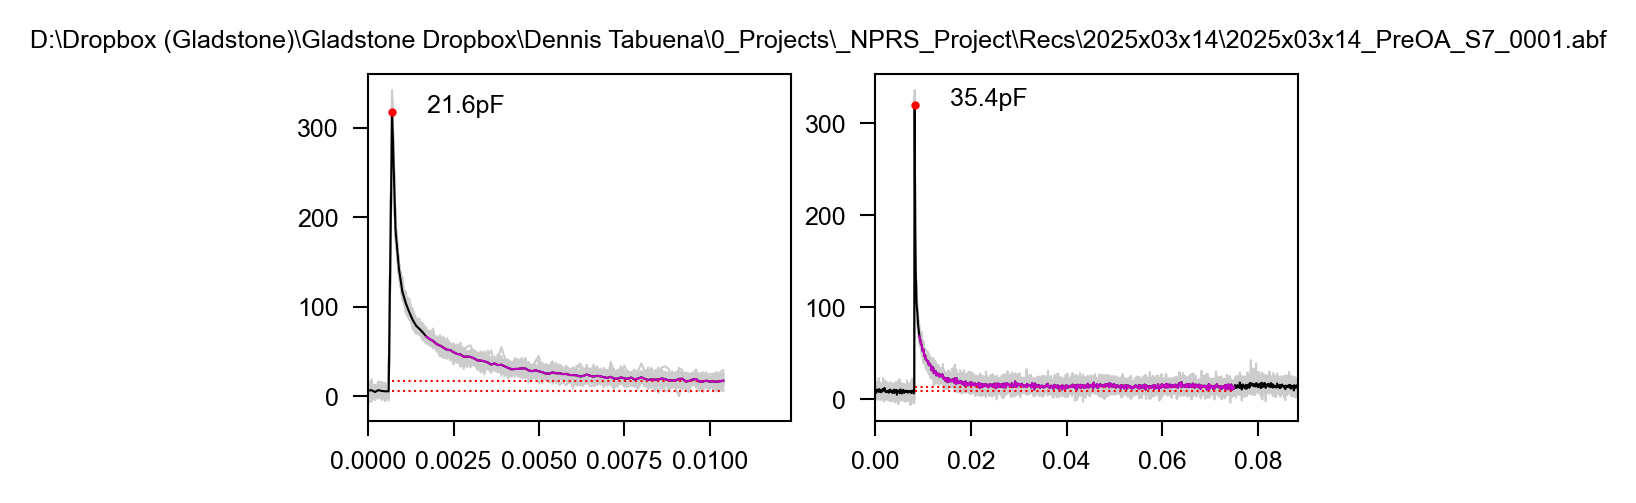

Analyzing VC - MemTest-10ms-160ms:  91%|██████████████████████████████████████████▋    | 10/11 [00:16<00:01,  1.67s/it]

<Figure size 450x450 with 0 Axes>

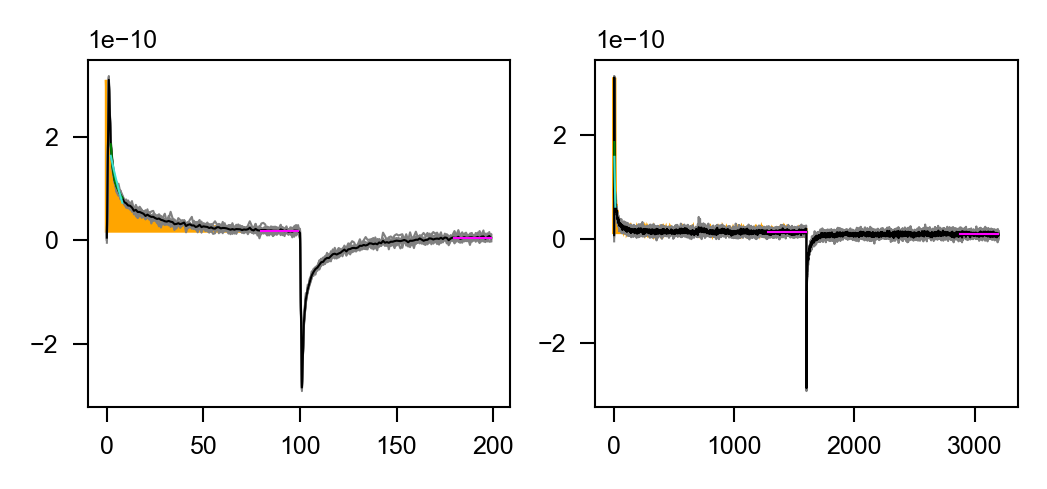

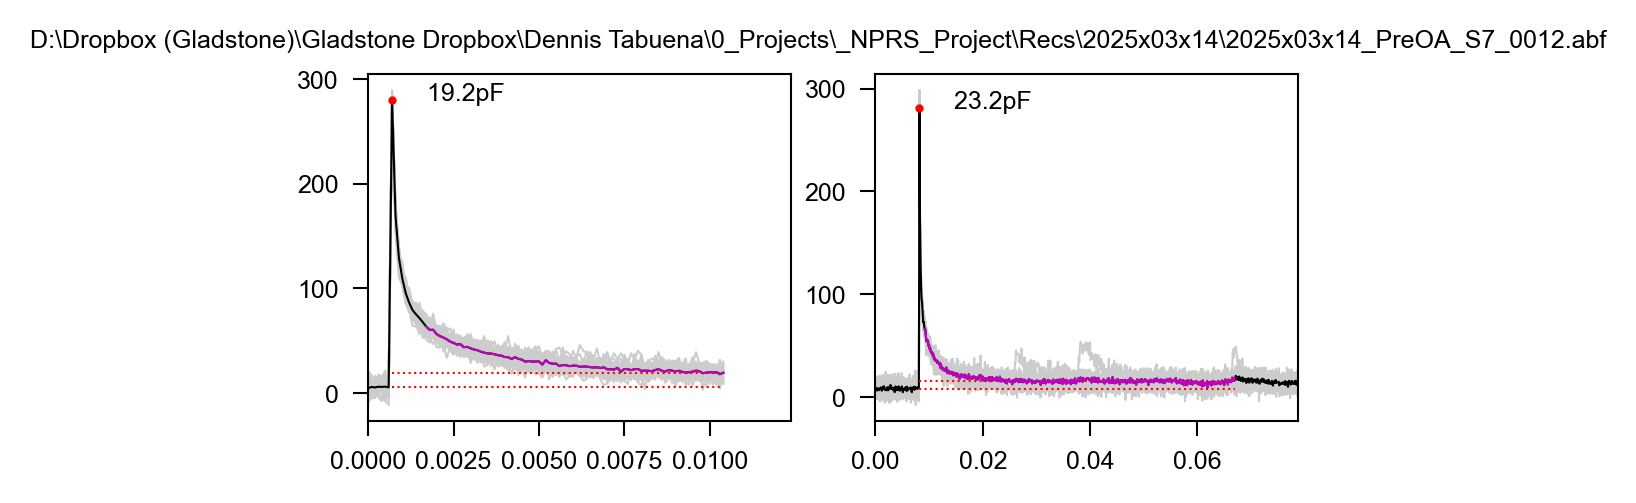

Analyzing VC - Multi IV - 150ms:   0%|                                                          | 0/11 [00:00<?, ?it/s]

<Figure size 450x450 with 0 Axes>

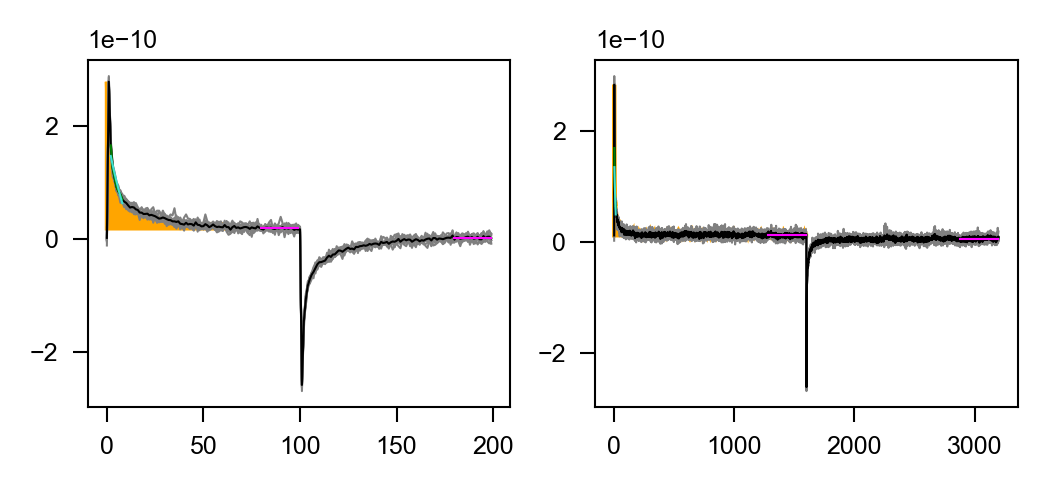

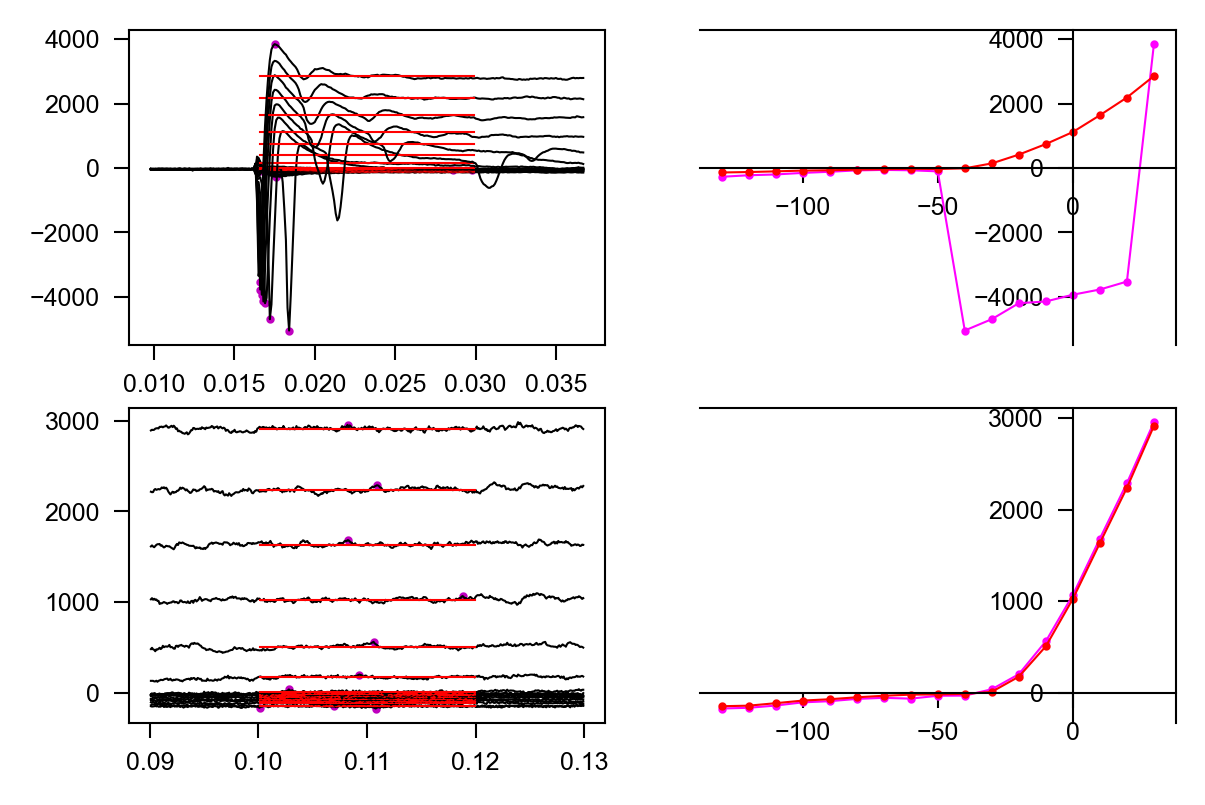

Analyzing VC - Multi IV - 150ms:   9%|████▌                                             | 1/11 [00:02<00:25,  2.55s/it]

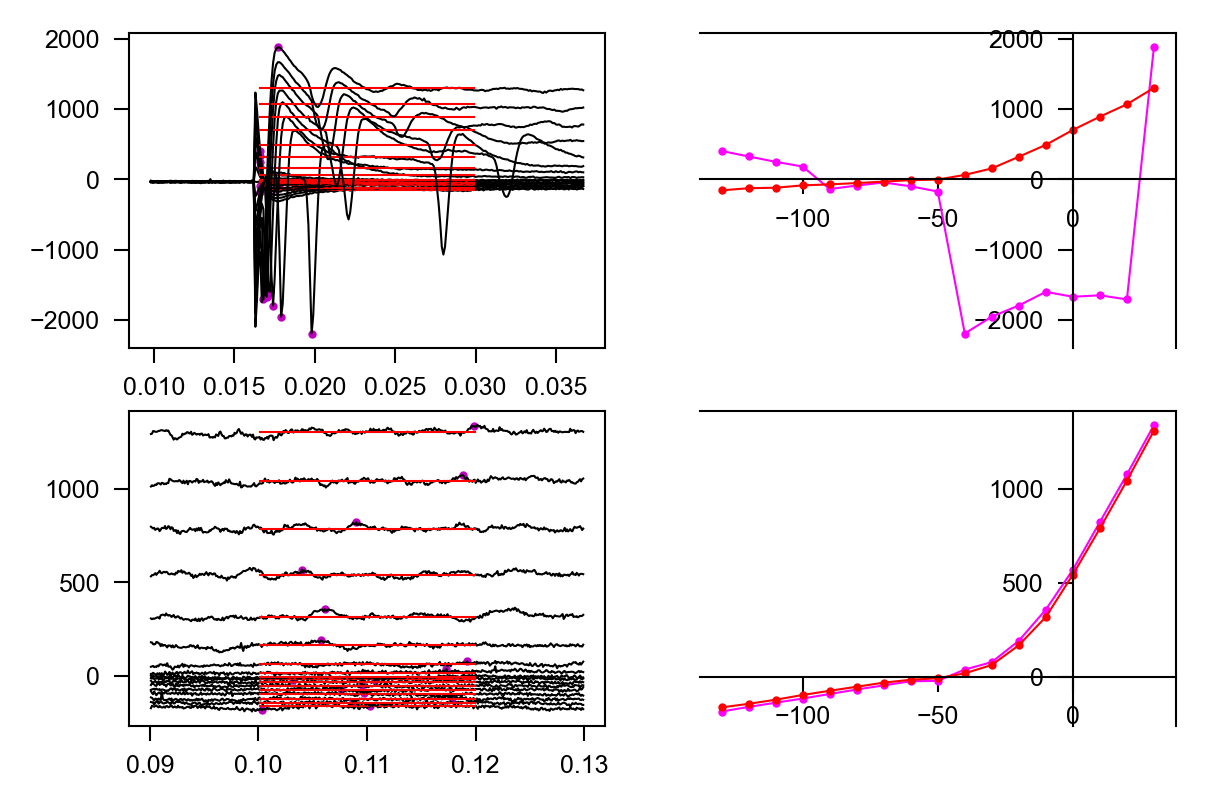

Analyzing VC - Multi IV - 150ms:  18%|█████████                                         | 2/11 [00:04<00:19,  2.13s/it]

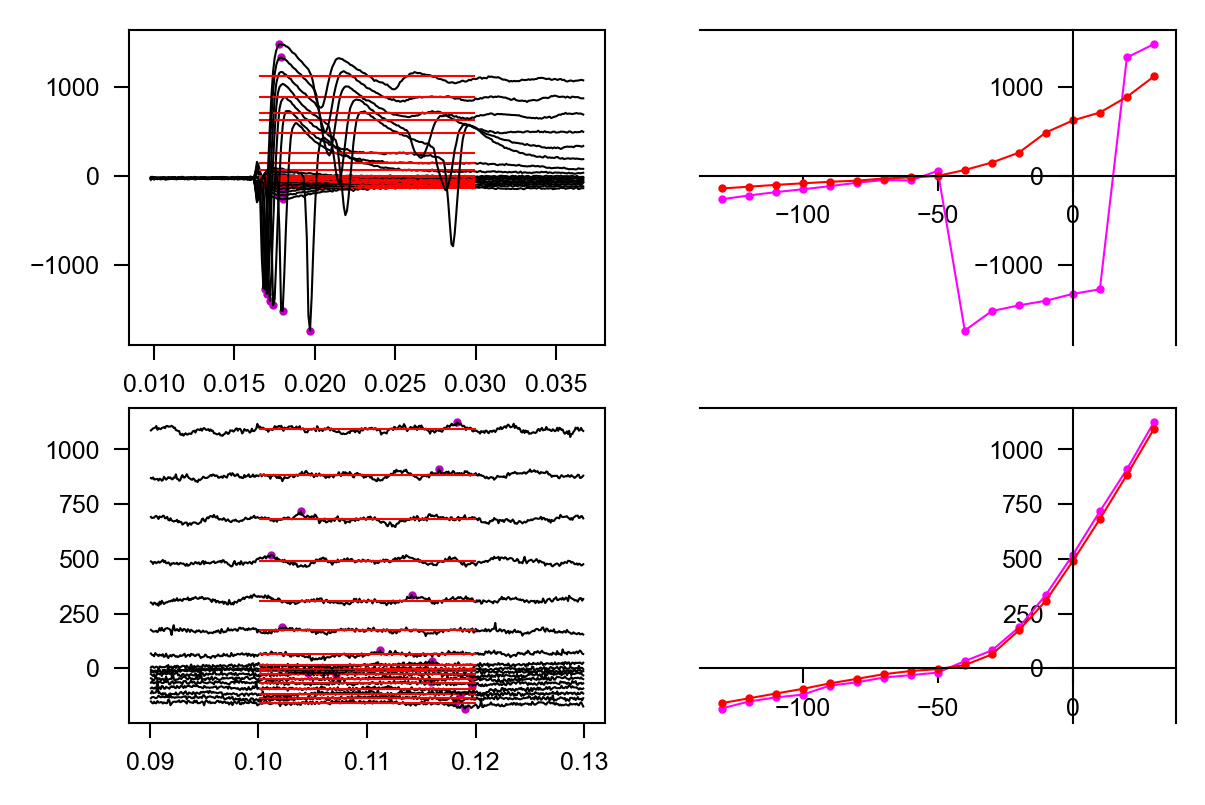

Analyzing VC - Multi IV - 150ms:  27%|█████████████▋                                    | 3/11 [00:06<00:15,  1.99s/it]

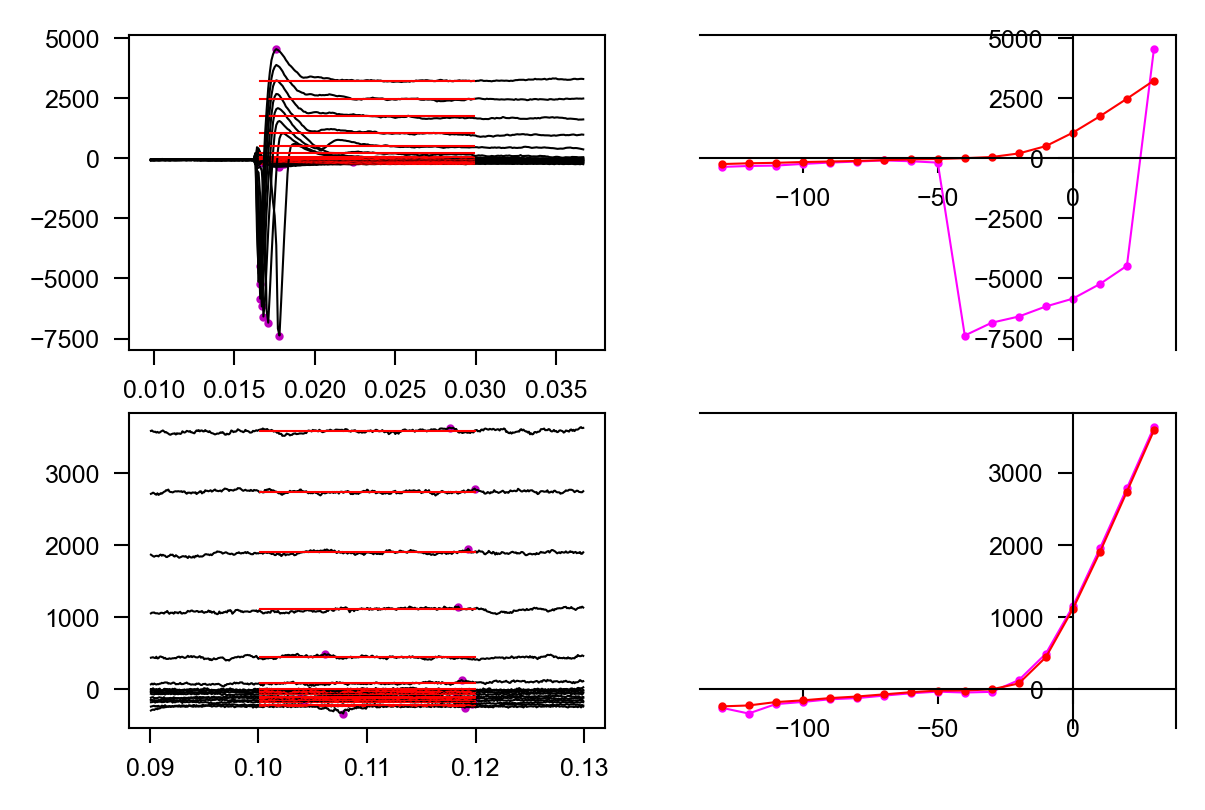

Analyzing VC - Multi IV - 150ms:  36%|██████████████████▏                               | 4/11 [00:08<00:13,  2.00s/it]

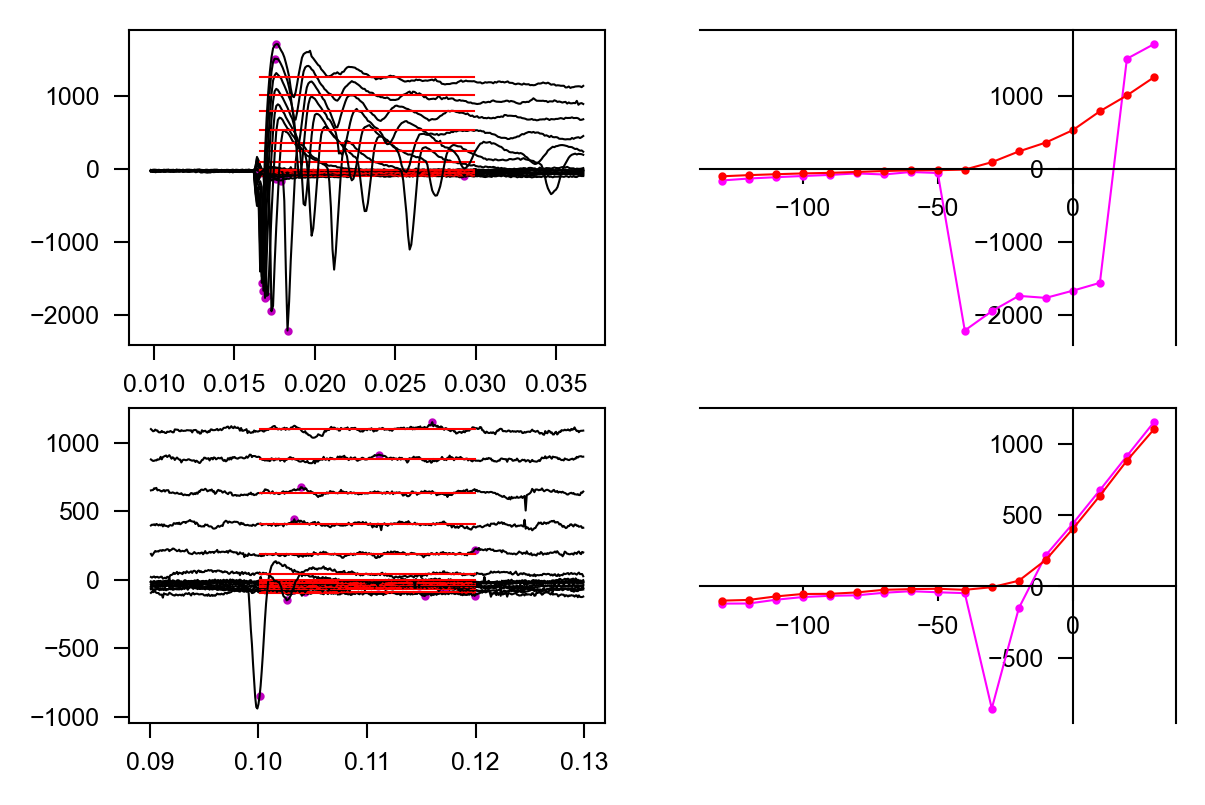

Analyzing VC - Multi IV - 150ms:  45%|██████████████████████▋                           | 5/11 [00:10<00:11,  1.99s/it]

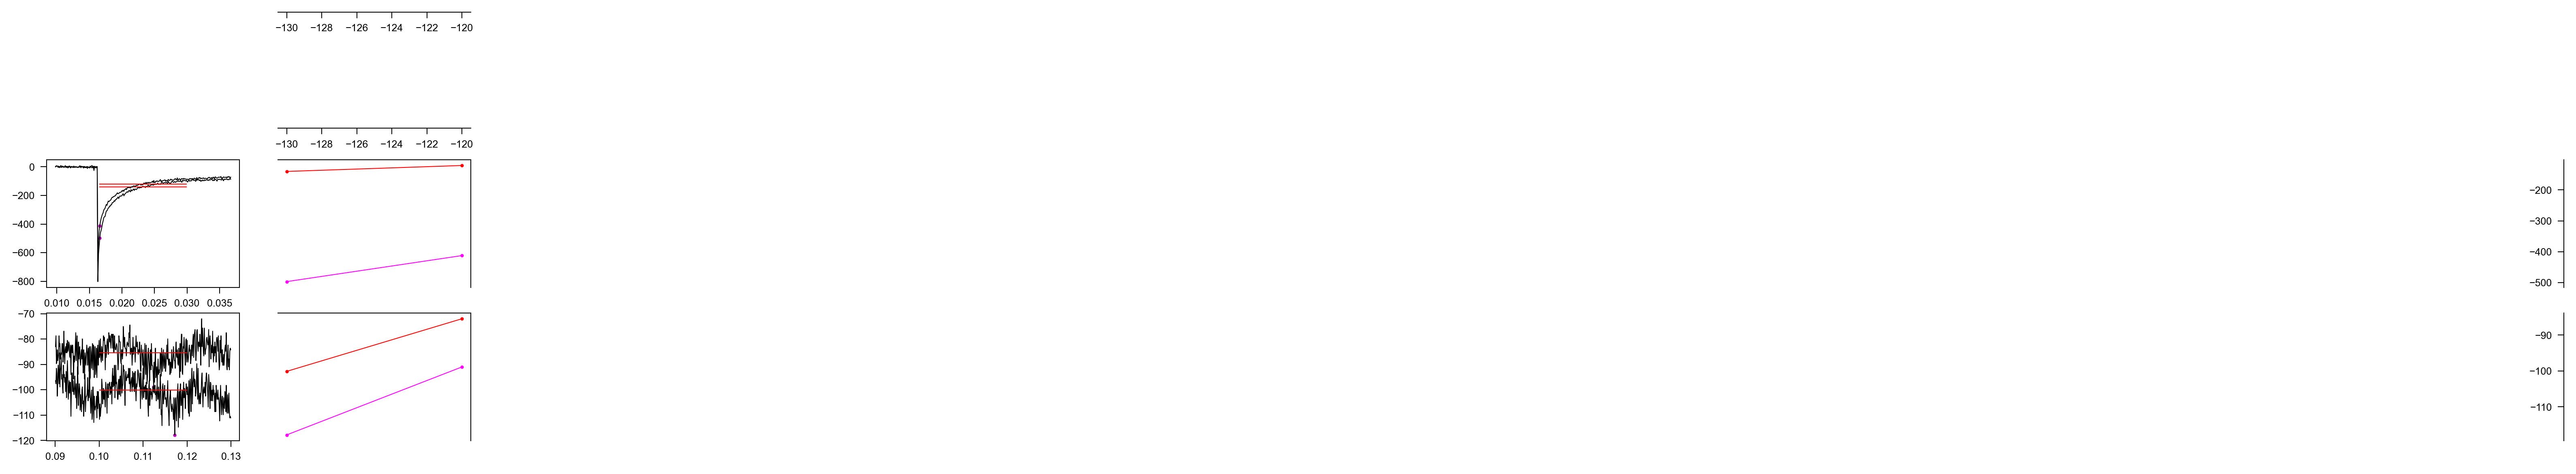

Analyzing VC - Multi IV - 150ms:  55%|███████████████████████████▎                      | 6/11 [00:12<00:09,  1.96s/it]

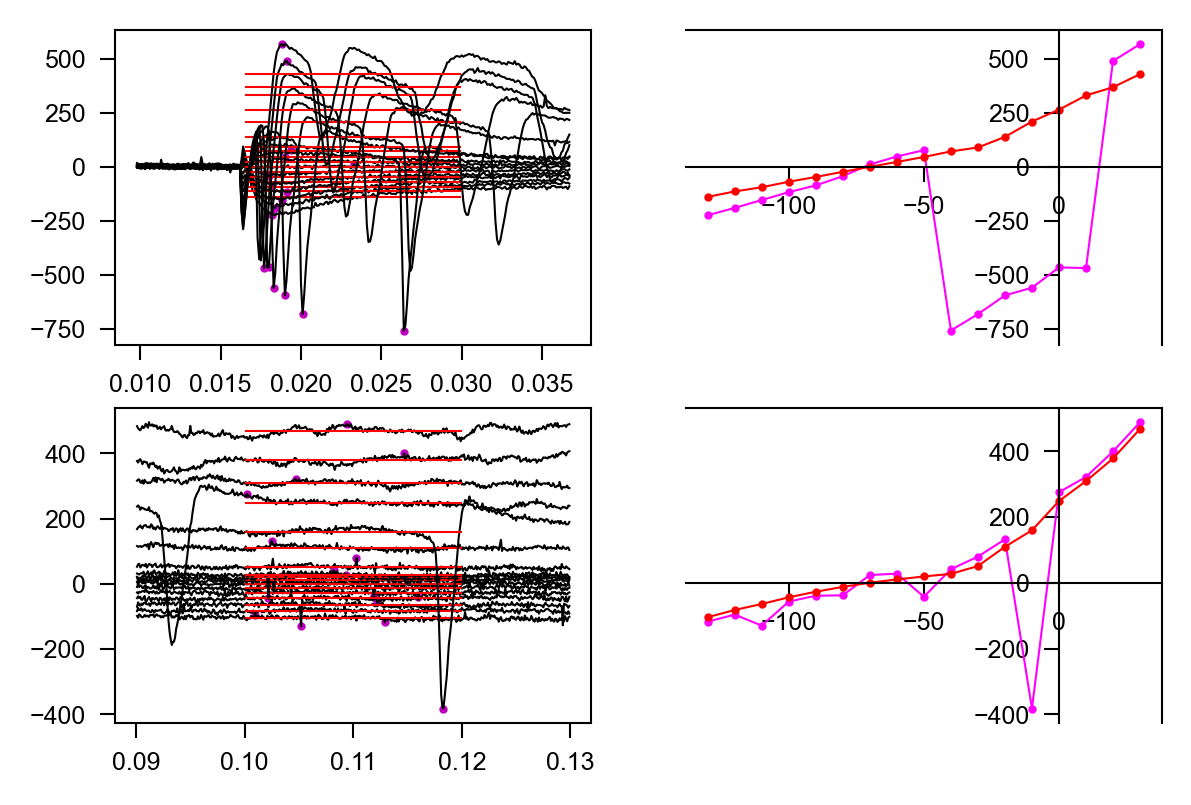

Analyzing VC - Multi IV - 150ms:  64%|███████████████████████████████▊                  | 7/11 [00:14<00:07,  1.99s/it]

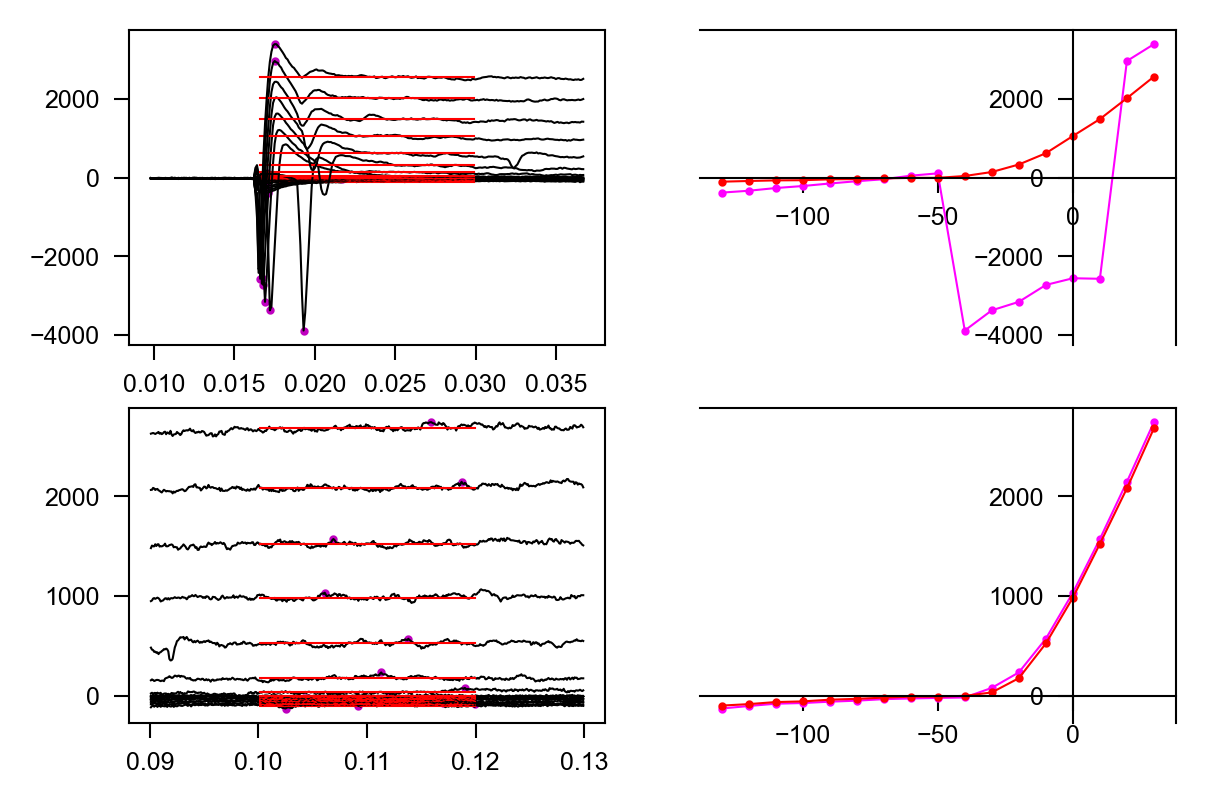

Analyzing VC - Multi IV - 150ms:  73%|████████████████████████████████████▎             | 8/11 [00:16<00:05,  1.97s/it]

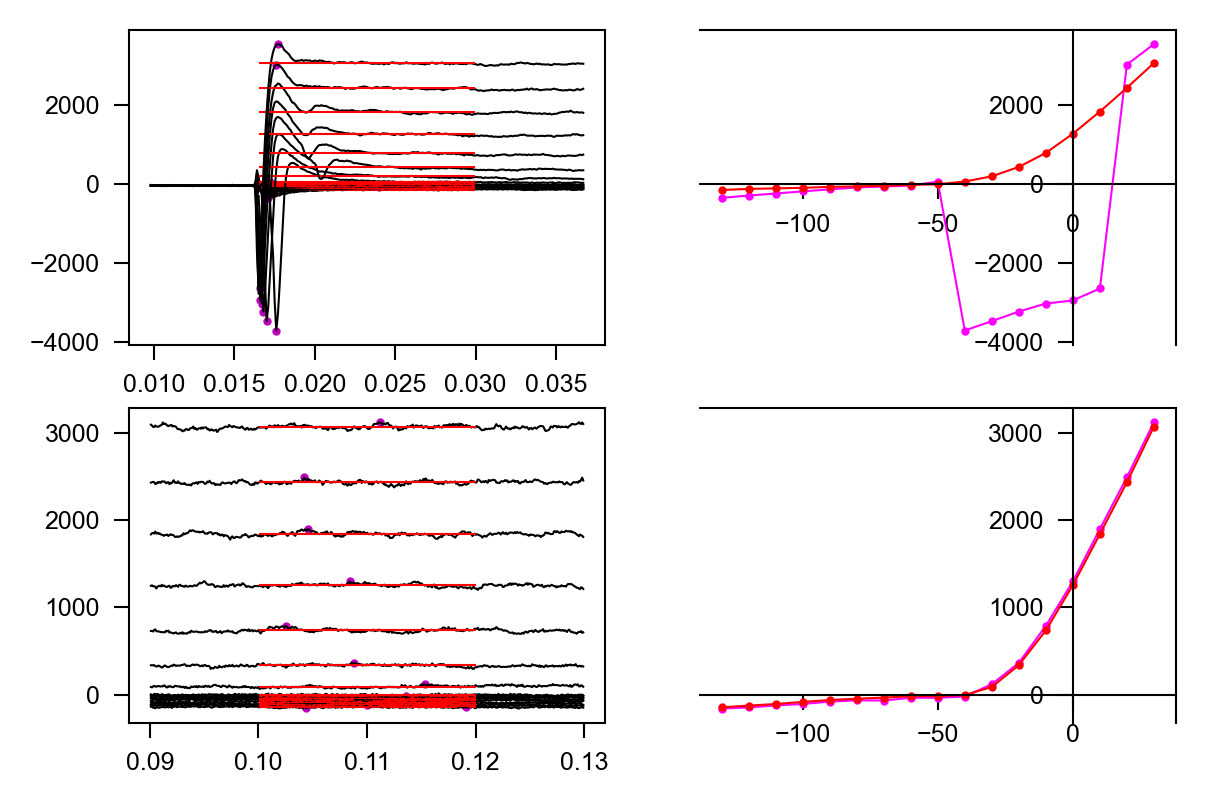

Analyzing VC - Multi IV - 150ms:  82%|████████████████████████████████████████▉         | 9/11 [00:18<00:03,  1.97s/it]

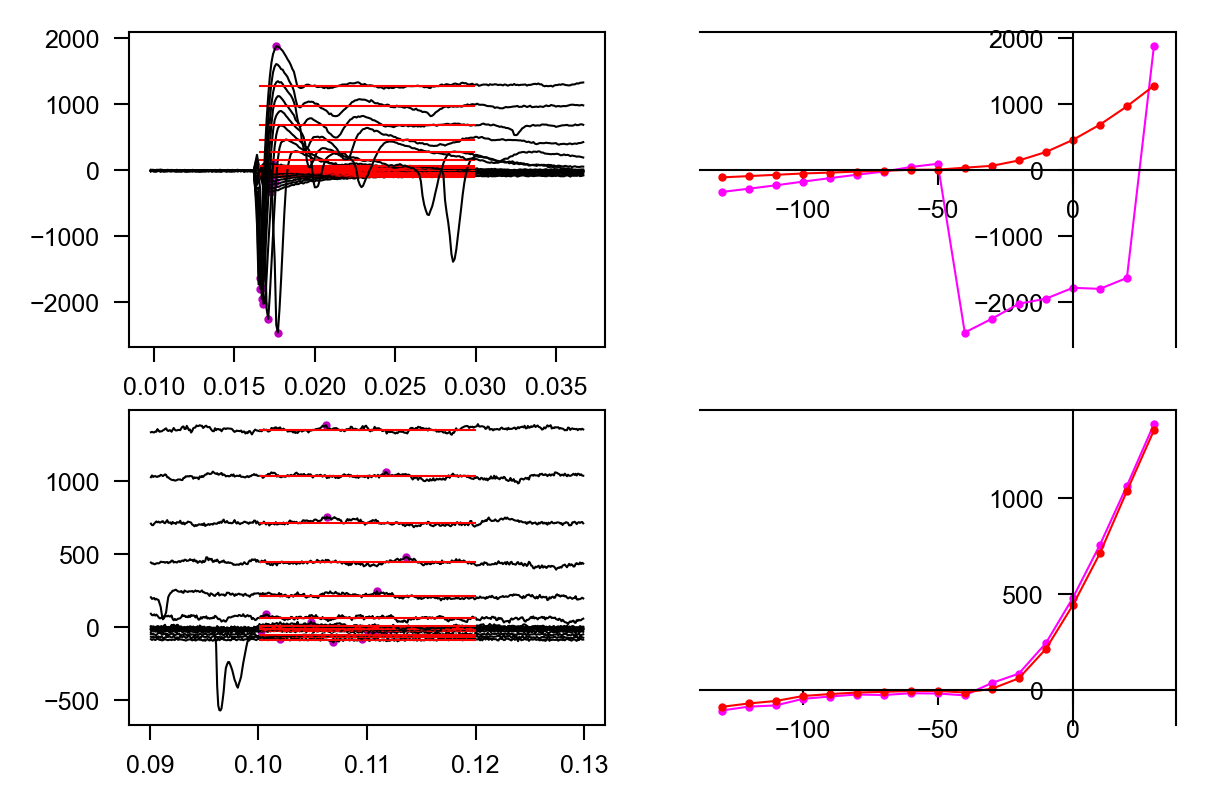

Analyzing VC - Multi IV - 150ms:  91%|████████████████████████████████████████████▌    | 10/11 [00:20<00:02,  2.08s/it]

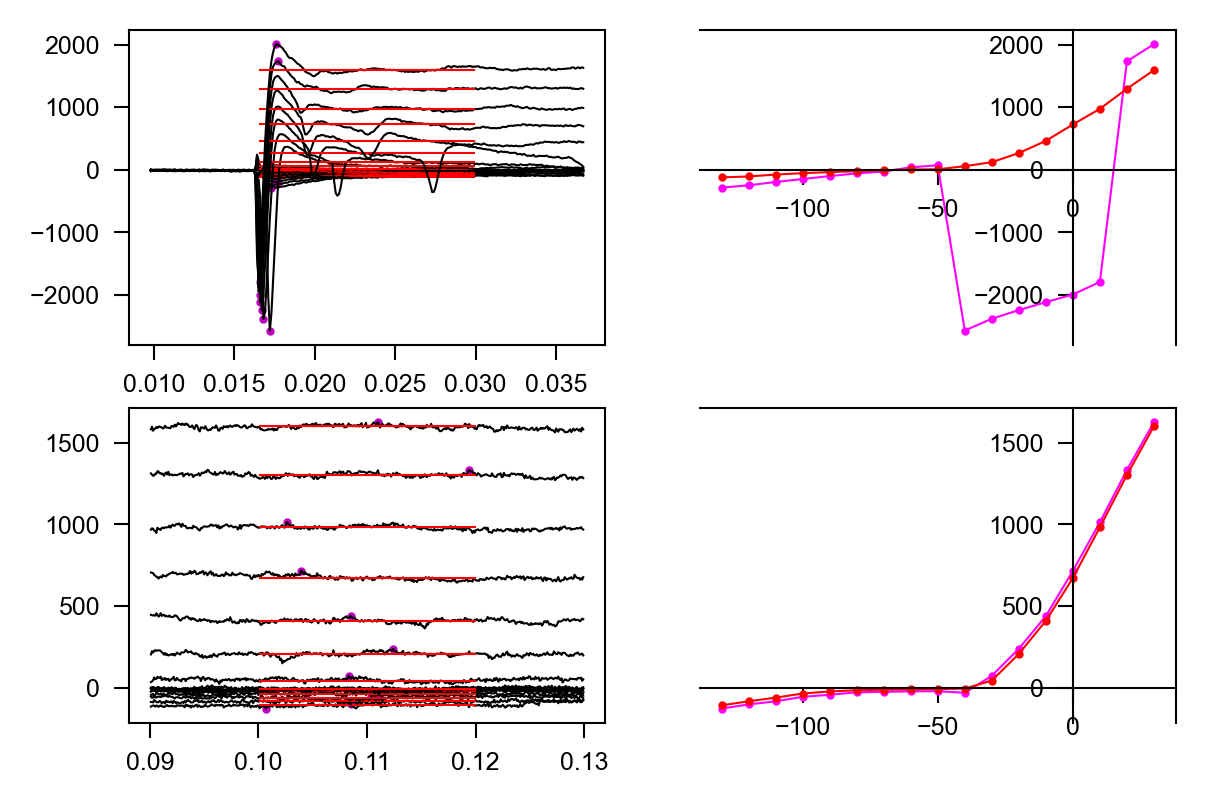

Analyzing VC - Multi IV - 150ms: 100%|█████████████████████████████████████████████████| 11/11 [00:22<00:00,  2.02s/it]

D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0000.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0001.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0002.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0021.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0005.abf index 40000 is out of bounds for axis 0 with size 40000
rmp_results
gain_results
latencey_results
input_resistance_results
rheobase_results
membrane_results
IV_results


In [145]:
consolidated_results, problem_records = execute_analysis_suite(protocol_groups, protocol_analyzers)


In [146]:
for k,v in problem_records.items():
    print(k,v)
for k,v in consolidated_results.items():
    print(k)
    v.to_csv(f'{k}.csv')

D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0000.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0001.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0002.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0021.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0005.abf index 40000 is out of bounds for axis 0 with size 40000
rmp_results
gain_results
latencey_results
input_resistance_results
rheobase_results
membrane_results
IV_results
